# Study Overview

In this study, we are trying to analyze the psychophysiological data i.e. EDA and Temperature in 2 scenarios: 

* How EDA varies when the person is showering on his own and when the person is showering when the other is present.


      -whether the perceived pain and stress is less when the partner is present
* How EDA is changing over time while showering 
* How EDA and HR differ over the test periods (on day basis)

# Import Library

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the data

## EDA

### Day 0

In [2]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_0 = pd.read_csv('data/exp_1/EDA.csv' , header= None)
fl_eda_0.columns  = ['eda']
fl_eda_freq_0 = fl_eda_0.iloc[1].values
print(len(fl_eda_0))
print('freq: ', fl_eda_freq_0)
fl_eda_0.head(10)

1232
freq:  [4.]


eda
0  1.526949e+09
1  4.000000e+00
2  0.000000e+00
3  3.446160e-01
4  4.150760e-01
5  4.278870e-01
6  4.330120e-01
7  4.227630e-01
8  3.804870e-01
9  3.881730e-01

In [3]:
fl_init_time_0 = datetime.datetime.utcfromtimestamp(fl_eda_0.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_0

'2018-05-22 00:29:47'

In [4]:
fl_eda_0 = fl_eda_0.iloc[3:]
fl_eda_0.head(5)

eda
3  0.344616
4  0.415076
5  0.427887
6  0.433012
7  0.422763

In [5]:
#create index 
fl_time_eda_0 = pd.date_range(start=fl_init_time_0, periods=len(fl_eda_0), freq=str(1/int(fl_eda_freq_0))+'S')
fl_time_eda_0

DatetimeIndex([       '2018-05-22 00:29:47', '2018-05-22 00:29:47.250000',
               '2018-05-22 00:29:47.500000', '2018-05-22 00:29:47.750000',
                      '2018-05-22 00:29:48', '2018-05-22 00:29:48.250000',
               '2018-05-22 00:29:48.500000', '2018-05-22 00:29:48.750000',
                      '2018-05-22 00:29:49', '2018-05-22 00:29:49.250000',
               ...
               '2018-05-22 00:34:51.750000',        '2018-05-22 00:34:52',
               '2018-05-22 00:34:52.250000', '2018-05-22 00:34:52.500000',
               '2018-05-22 00:34:52.750000',        '2018-05-22 00:34:53',
               '2018-05-22 00:34:53.250000', '2018-05-22 00:34:53.500000',
               '2018-05-22 00:34:53.750000',        '2018-05-22 00:34:54'],
              dtype='datetime64[ns]', length=1229, freq='250L')

In [6]:
fl_eda_0 = fl_eda_0.set_index(fl_time_eda_0, drop =True)
fl_eda_0.head()

eda
2018-05-22 00:29:47.000  0.344616
2018-05-22 00:29:47.250  0.415076
2018-05-22 00:29:47.500  0.427887
2018-05-22 00:29:47.750  0.433012
2018-05-22 00:29:48.000  0.422763

In [7]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_0 = fl_eda_0[:-12]
fl_eda_0 = fl_eda_0.dropna()
print(len(fl_eda_0))
fl_eda_0.head()

1217


eda
2018-05-22 00:29:47.000  0.344616
2018-05-22 00:29:47.250  0.415076
2018-05-22 00:29:47.500  0.427887
2018-05-22 00:29:47.750  0.433012
2018-05-22 00:29:48.000  0.422763

### Day 1

In [8]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_1 = pd.read_csv('data/exp_2/EDA.csv' , header= None)
fl_eda_1.columns  = ['eda']
fl_eda_freq_1 = fl_eda_1.iloc[1].values
print(len(fl_eda_1))
print('freq: ', fl_eda_freq_1)
fl_eda_1.head(10)

2120
freq:  [4.]


eda
0  1.527038e+09
1  4.000000e+00
2  0.000000e+00
3  2.062570e-01
4  3.523020e-01
5  3.561460e-01
6  3.548650e-01
7  3.574270e-01
8  3.574270e-01
9  3.369290e-01

In [9]:
fl_init_time_1 = datetime.datetime.utcfromtimestamp(fl_eda_1.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_1

'2018-05-23 01:09:12'

In [10]:
fl_eda_1 = fl_eda_1.iloc[3:]
fl_eda_1.head(5)

eda
3  0.206257
4  0.352302
5  0.356146
6  0.354865
7  0.357427

In [11]:
#create index 
fl_time_eda_1 = pd.date_range(start=fl_init_time_1, periods=len(fl_eda_1), freq=str(1/int(fl_eda_freq_1))+'S')
fl_time_eda_1

DatetimeIndex([       '2018-05-23 01:09:12', '2018-05-23 01:09:12.250000',
               '2018-05-23 01:09:12.500000', '2018-05-23 01:09:12.750000',
                      '2018-05-23 01:09:13', '2018-05-23 01:09:13.250000',
               '2018-05-23 01:09:13.500000', '2018-05-23 01:09:13.750000',
                      '2018-05-23 01:09:14', '2018-05-23 01:09:14.250000',
               ...
               '2018-05-23 01:17:58.750000',        '2018-05-23 01:17:59',
               '2018-05-23 01:17:59.250000', '2018-05-23 01:17:59.500000',
               '2018-05-23 01:17:59.750000',        '2018-05-23 01:18:00',
               '2018-05-23 01:18:00.250000', '2018-05-23 01:18:00.500000',
               '2018-05-23 01:18:00.750000',        '2018-05-23 01:18:01'],
              dtype='datetime64[ns]', length=2117, freq='250L')

In [12]:
fl_eda_1 = fl_eda_1.set_index(fl_time_eda_1, drop =True)
fl_eda_1.head()

eda
2018-05-23 01:09:12.000  0.206257
2018-05-23 01:09:12.250  0.352302
2018-05-23 01:09:12.500  0.356146
2018-05-23 01:09:12.750  0.354865
2018-05-23 01:09:13.000  0.357427

In [13]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_1 = fl_eda_1[:-12]
fl_eda_1 = fl_eda_1.dropna()
print(len(fl_eda_1))
fl_eda_1.head()

2105


eda
2018-05-23 01:09:12.000  0.206257
2018-05-23 01:09:12.250  0.352302
2018-05-23 01:09:12.500  0.356146
2018-05-23 01:09:12.750  0.354865
2018-05-23 01:09:13.000  0.357427

### Day 2

In [20]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_2 = pd.read_csv('data/exp_3/EDA.csv' , header= None)
fl_eda_2.columns  = ['eda']
fl_eda_freq_2 = fl_eda_2.iloc[1].values
print(len(fl_eda_2))
print('freq: ', fl_eda_freq_2)
fl_eda_2.head(10)

1664
freq:  [4.]


eda
0  1.527124e+09
1  4.000000e+00
2  0.000000e+00
3  4.125140e-01
4  4.688830e-01
5  4.765690e-01
6  4.740070e-01
7  4.765690e-01
8  4.765690e-01
9  4.765690e-01

In [22]:
fl_init_time_2 = datetime.datetime.utcfromtimestamp(fl_eda_2.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_2

'2018-05-24 01:07:49'

In [23]:
fl_eda_2 = fl_eda_2.iloc[3:]
fl_eda_2.head(5)

eda
3  0.412514
4  0.468883
5  0.476569
6  0.474007
7  0.476569

In [24]:
#create index 
fl_time_eda_2 = pd.date_range(start=fl_init_time_2, periods=len(fl_eda_2), freq=str(1/int(fl_eda_freq_2))+'S')
fl_time_eda_2

DatetimeIndex([       '2018-05-24 01:07:49', '2018-05-24 01:07:49.250000',
               '2018-05-24 01:07:49.500000', '2018-05-24 01:07:49.750000',
                      '2018-05-24 01:07:50', '2018-05-24 01:07:50.250000',
               '2018-05-24 01:07:50.500000', '2018-05-24 01:07:50.750000',
                      '2018-05-24 01:07:51', '2018-05-24 01:07:51.250000',
               ...
               '2018-05-24 01:14:41.750000',        '2018-05-24 01:14:42',
               '2018-05-24 01:14:42.250000', '2018-05-24 01:14:42.500000',
               '2018-05-24 01:14:42.750000',        '2018-05-24 01:14:43',
               '2018-05-24 01:14:43.250000', '2018-05-24 01:14:43.500000',
               '2018-05-24 01:14:43.750000',        '2018-05-24 01:14:44'],
              dtype='datetime64[ns]', length=1661, freq='250L')

In [25]:
fl_eda_2 = fl_eda_2.set_index(fl_time_eda_2, drop =True)
fl_eda_2.head()

eda
2018-05-24 01:07:49.000  0.412514
2018-05-24 01:07:49.250  0.468883
2018-05-24 01:07:49.500  0.476569
2018-05-24 01:07:49.750  0.474007
2018-05-24 01:07:50.000  0.476569

In [26]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_2 = fl_eda_2[:-12]
fl_eda_2 = fl_eda_2.dropna()
print(len(fl_eda_2))
fl_eda_2.head()

1649


eda
2018-05-24 01:07:49.000  0.412514
2018-05-24 01:07:49.250  0.468883
2018-05-24 01:07:49.500  0.476569
2018-05-24 01:07:49.750  0.474007
2018-05-24 01:07:50.000  0.476569

### Visualization

#### Remove Outliers

In [14]:
fl_exp0 = fl_eda_0.copy()#example dataset of normally distributed data. 
fl_exp0= fl_exp0[np.abs(fl_exp0.eda-fl_exp0.eda.mean())<=(3*fl_exp0.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp0= fl_exp0[~(np.abs(fl_exp0.eda-fl_exp0.eda.mean())>(3*fl_exp0.eda.std()))] #or if you prefer the other way around

print(len(fl_exp0))
fl_exp0.eda[:10]


1205


2018-05-22 00:29:47.000    0.344616
2018-05-22 00:29:47.250    0.415076
2018-05-22 00:29:48.250    0.380487
2018-05-22 00:29:48.500    0.388173
2018-05-22 00:29:48.750    0.416357
2018-05-22 00:29:49.000    0.374081
2018-05-22 00:29:49.250    0.353584
2018-05-22 00:29:49.500    0.381768
2018-05-22 00:29:49.750    0.417639
2018-05-22 00:29:50.500    0.418920
Name: eda, dtype: float64

In [15]:
fl_exp1 = fl_eda_1.copy()#example dataset of normally distributed data. 
fl_exp1= fl_exp1[np.abs(fl_exp1.eda-fl_exp1.eda.mean())<=(3*fl_exp1.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp1= fl_exp1[~(np.abs(fl_exp1.eda-fl_exp1.eda.mean())>(3*fl_exp1.eda.std()))] #or if you prefer the other way around

print(len(fl_exp1))
fl_exp1.eda[:10]


2056


2018-05-23 01:09:12.250    0.352302
2018-05-23 01:09:12.500    0.356146
2018-05-23 01:09:12.750    0.354865
2018-05-23 01:09:13.000    0.357427
2018-05-23 01:09:13.250    0.357427
2018-05-23 01:09:13.500    0.336929
2018-05-23 01:09:13.750    0.356146
2018-05-23 01:09:14.000    0.354865
2018-05-23 01:09:14.250    0.356146
2018-05-23 01:09:14.500    0.354865
Name: eda, dtype: float64

In [28]:
fl_exp2 = fl_eda_2.copy()#example dataset of normally distributed data. 
fl_exp2= fl_exp2[np.abs(fl_exp2.eda-fl_exp2.eda.mean())<=(3*fl_exp2.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp2= fl_exp2[~(np.abs(fl_exp2.eda-fl_exp2.eda.mean())>(3*fl_exp2.eda.std()))] #or if you prefer the other way around

print(len(fl_exp2))
fl_exp2.eda[:10]


1632


2018-05-24 01:07:49.000    0.412514
2018-05-24 01:07:49.250    0.468883
2018-05-24 01:07:49.500    0.476569
2018-05-24 01:07:49.750    0.474007
2018-05-24 01:07:50.000    0.476569
2018-05-24 01:07:50.250    0.476569
2018-05-24 01:07:50.500    0.476569
2018-05-24 01:07:50.750    0.475288
2018-05-24 01:07:51.000    0.476569
2018-05-24 01:07:51.250    0.475288
Name: eda, dtype: float64

### Histogram

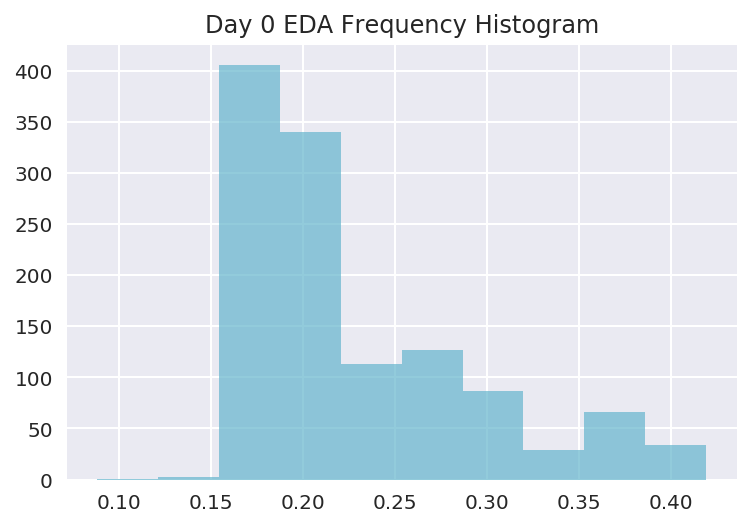

In [16]:
plt.hist(fl_exp0.eda, color = 'c', alpha = 0.7)
plt.title('Day 0 EDA Frequency Histogram')
plt.show()

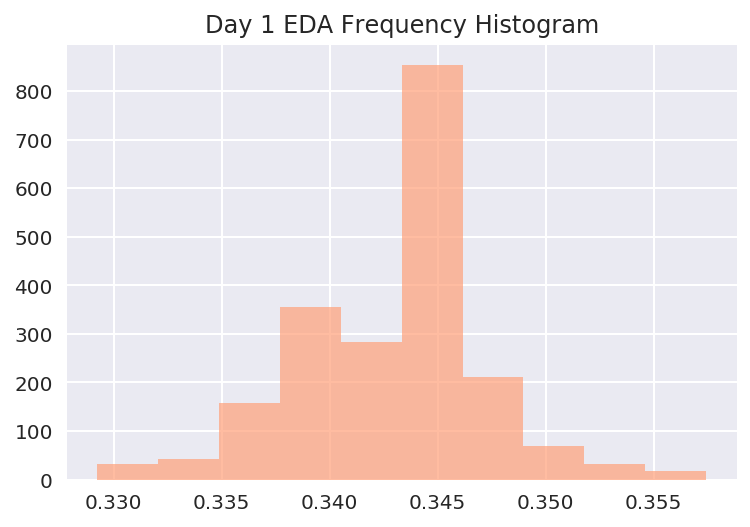

In [17]:
plt.hist(fl_exp1.eda, color = 'lightsalmon', alpha = 0.7)
plt.title('Day 1 EDA Frequency Histogram')
plt.show()

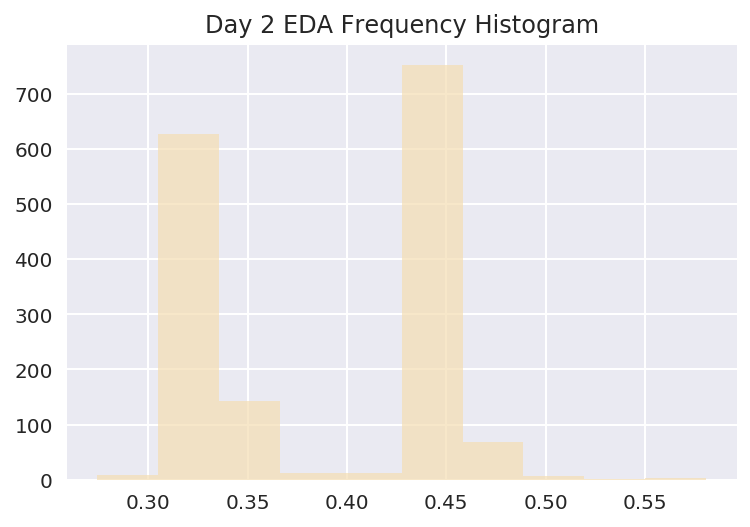

In [31]:
plt.hist(fl_exp2.eda, color = 'wheat', alpha = 0.7)
plt.title('Day 2 EDA Frequency Histogram')
plt.show()

#### Time-series Plot

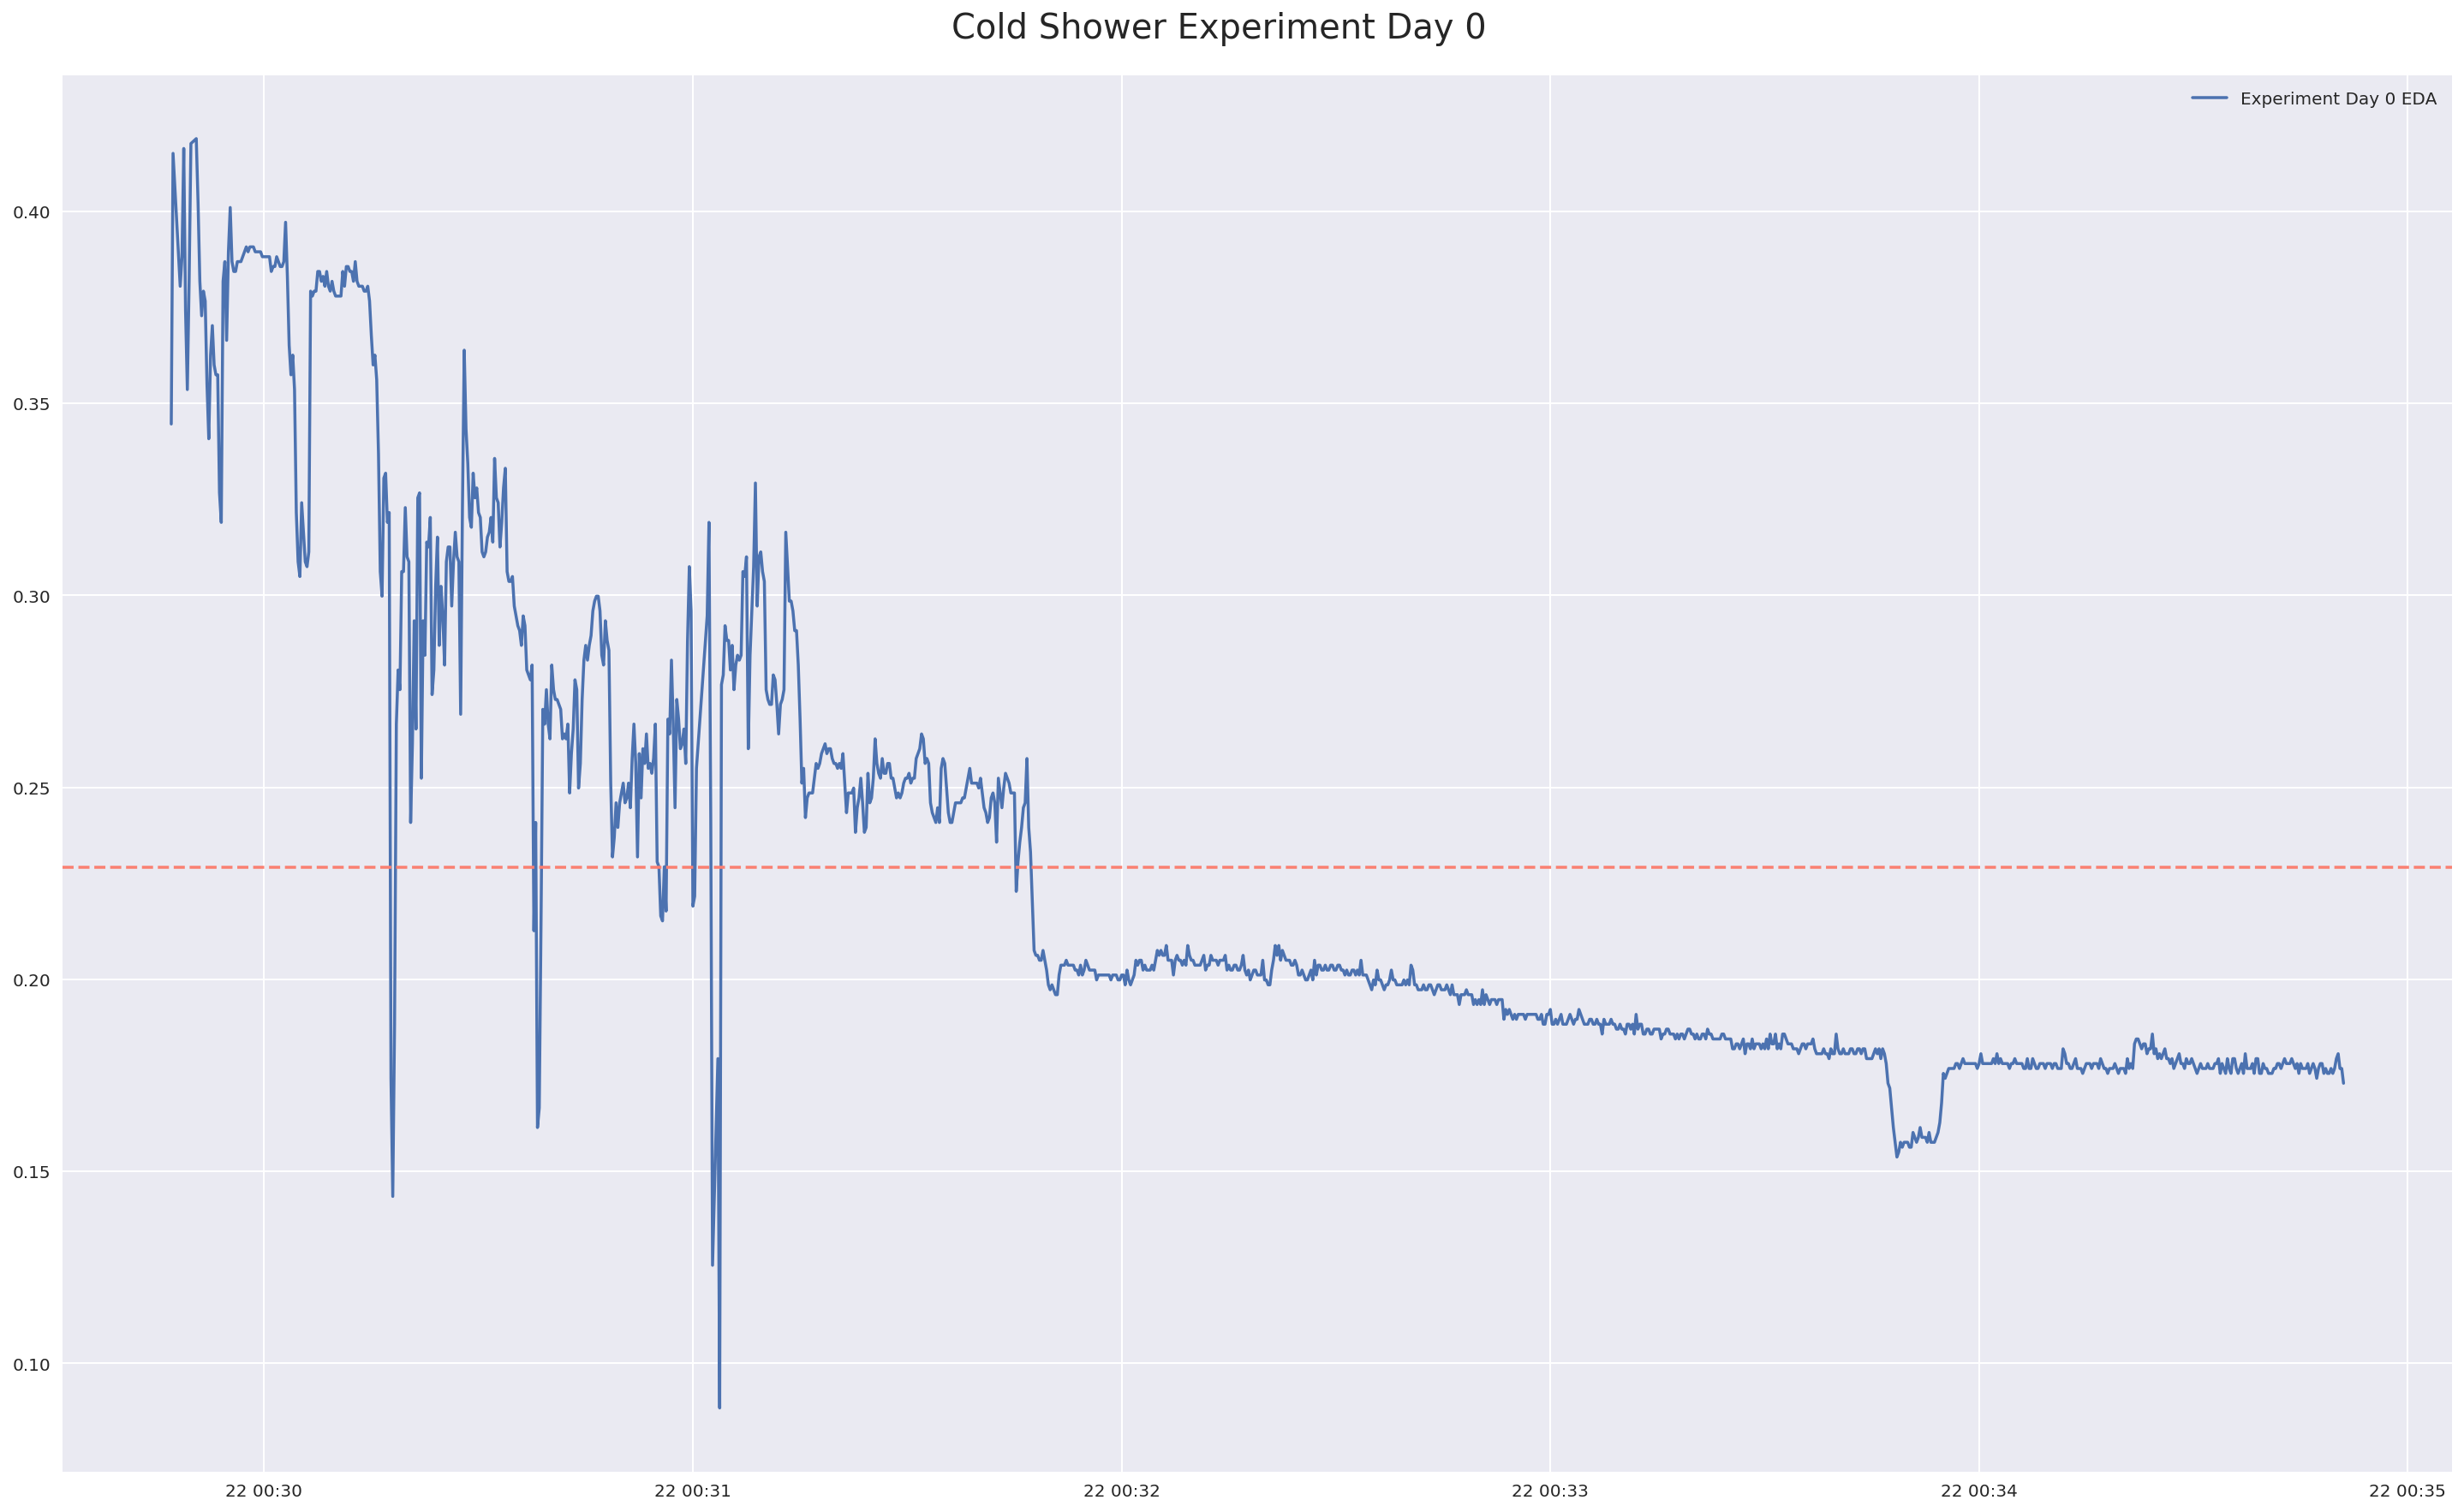

In [18]:
y_mean = np.mean(fl_exp0.eda)
plt.figure(figsize=(25,15))
plt.plot(fl_exp0)
plt.legend(['Experiment Day 0 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 0', fontsize=20, ha='center')
plt.show()

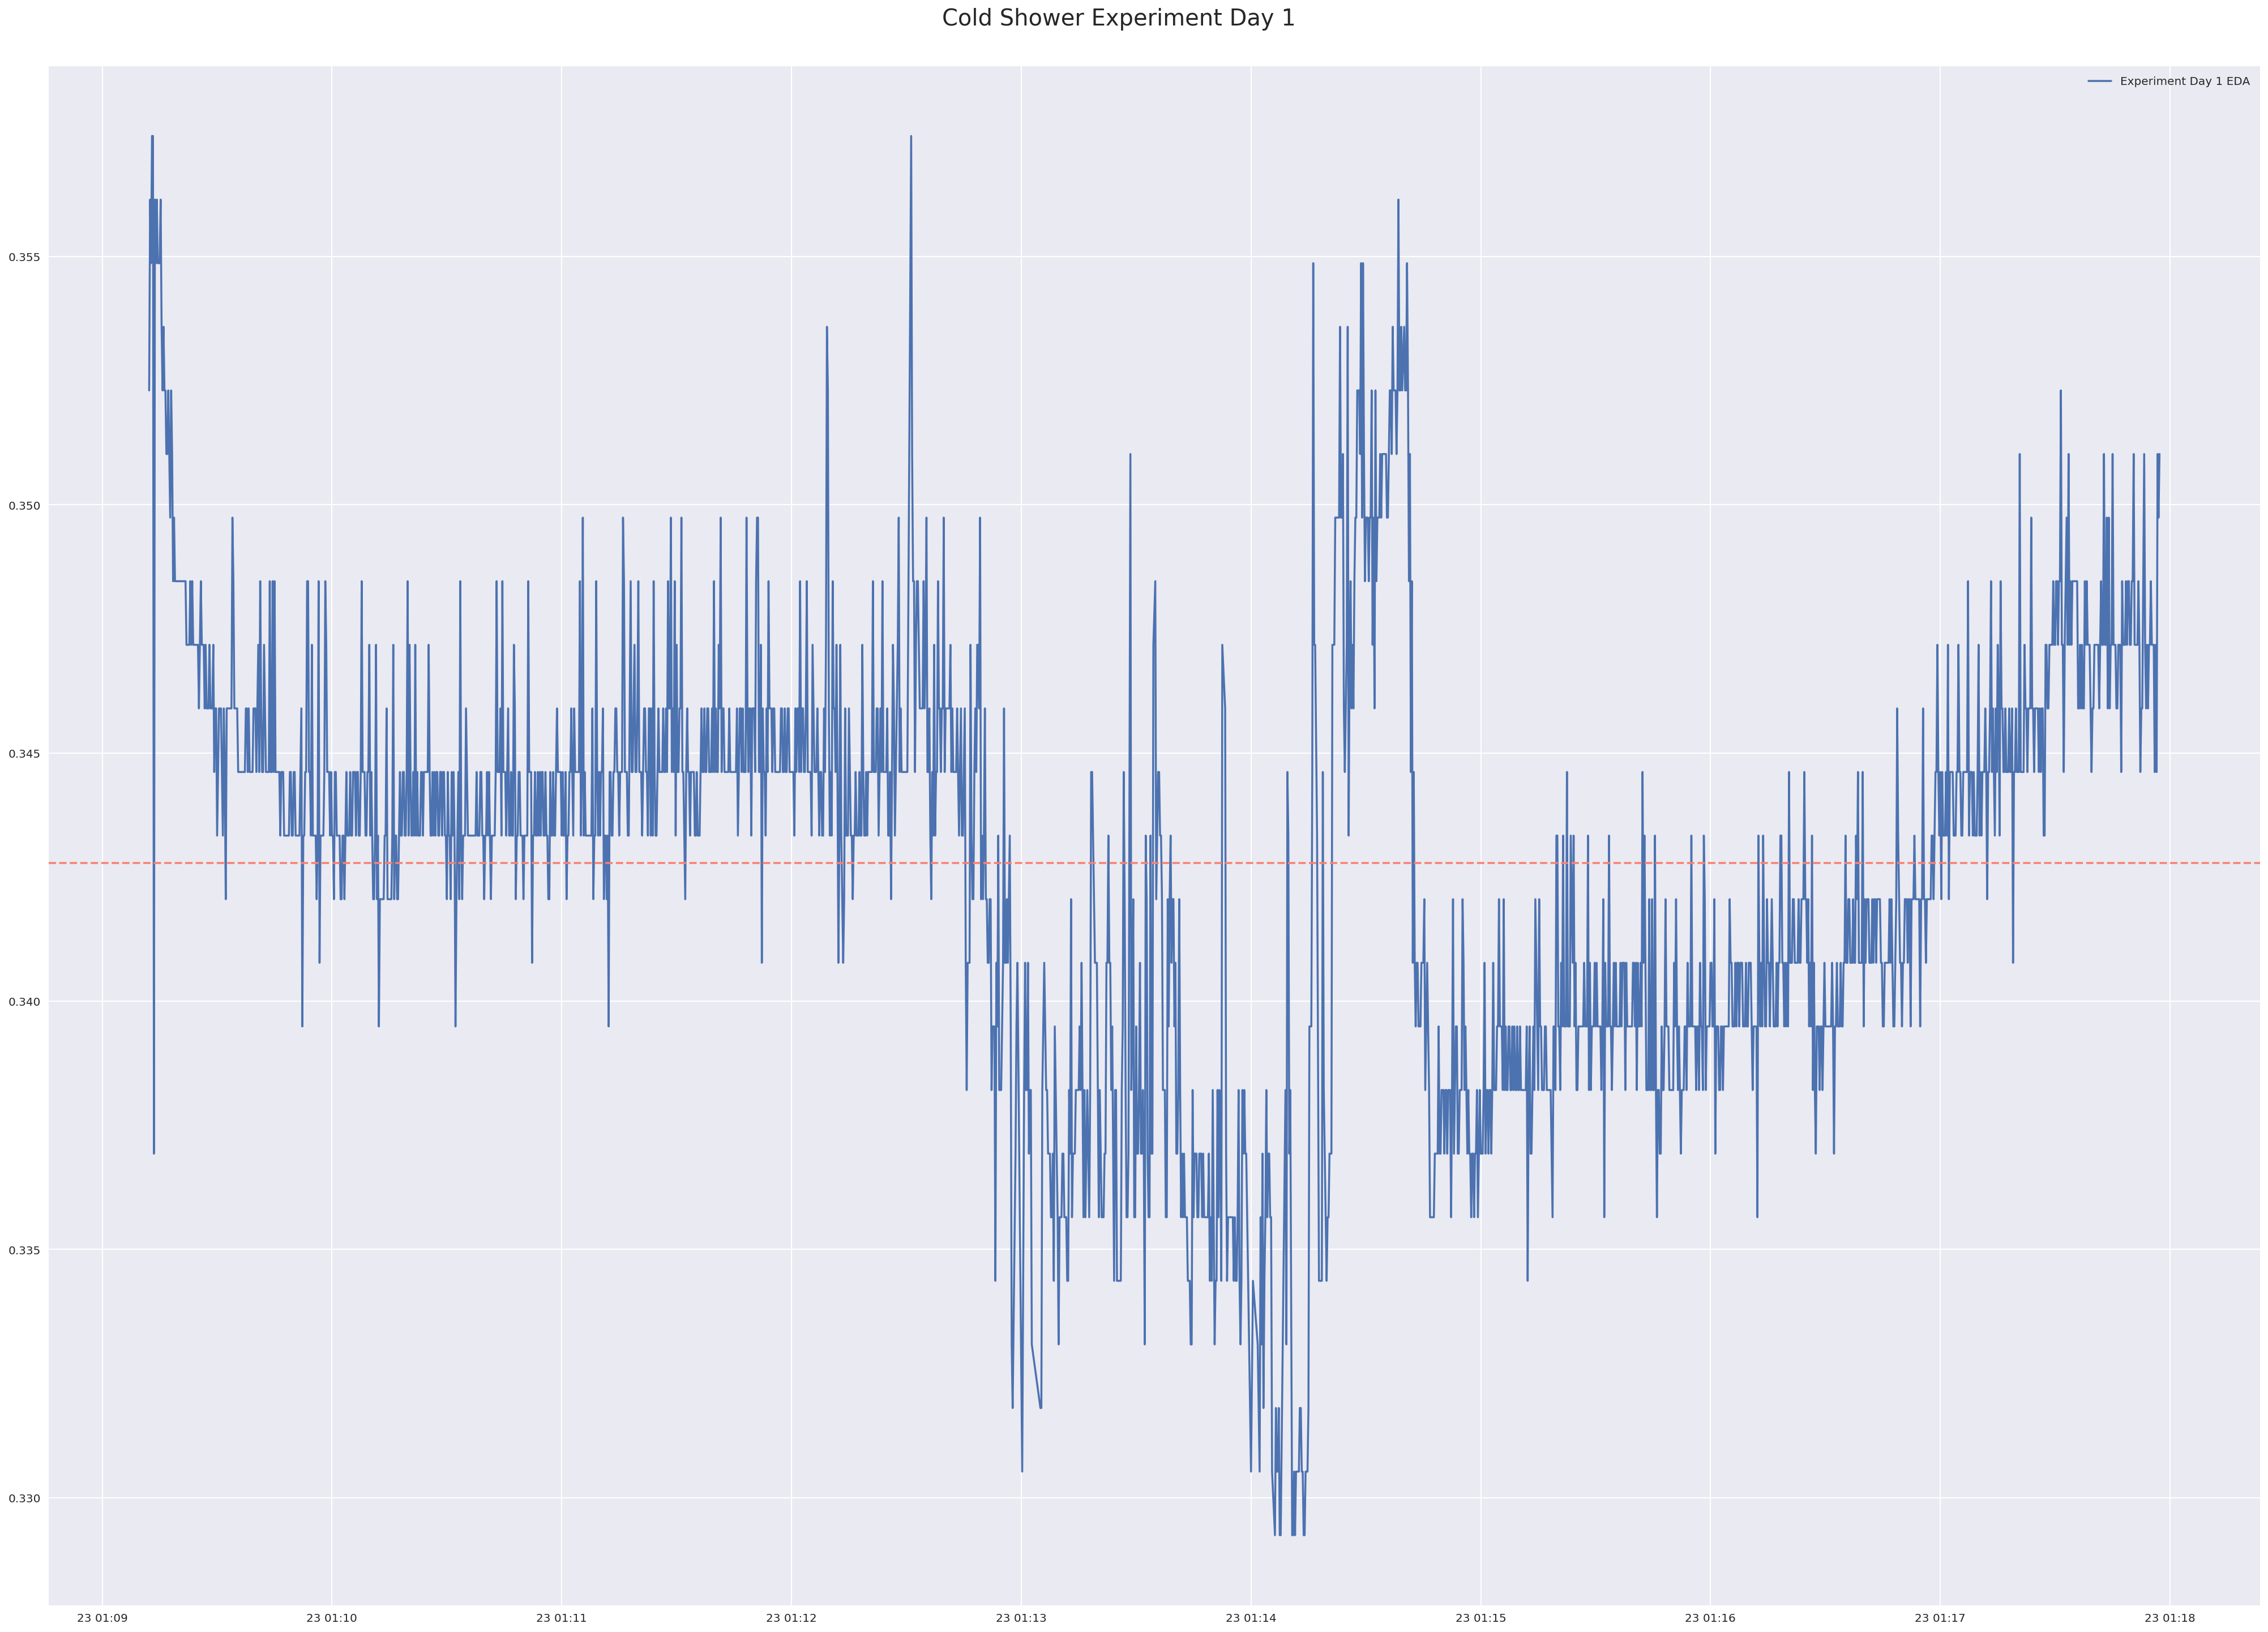

In [19]:
y_mean = np.mean(fl_exp1.eda)
plt.figure(figsize=(35,25))
plt.plot(fl_exp1)
plt.legend(['Experiment Day 1 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 1', fontsize=20, ha='center')
plt.show()

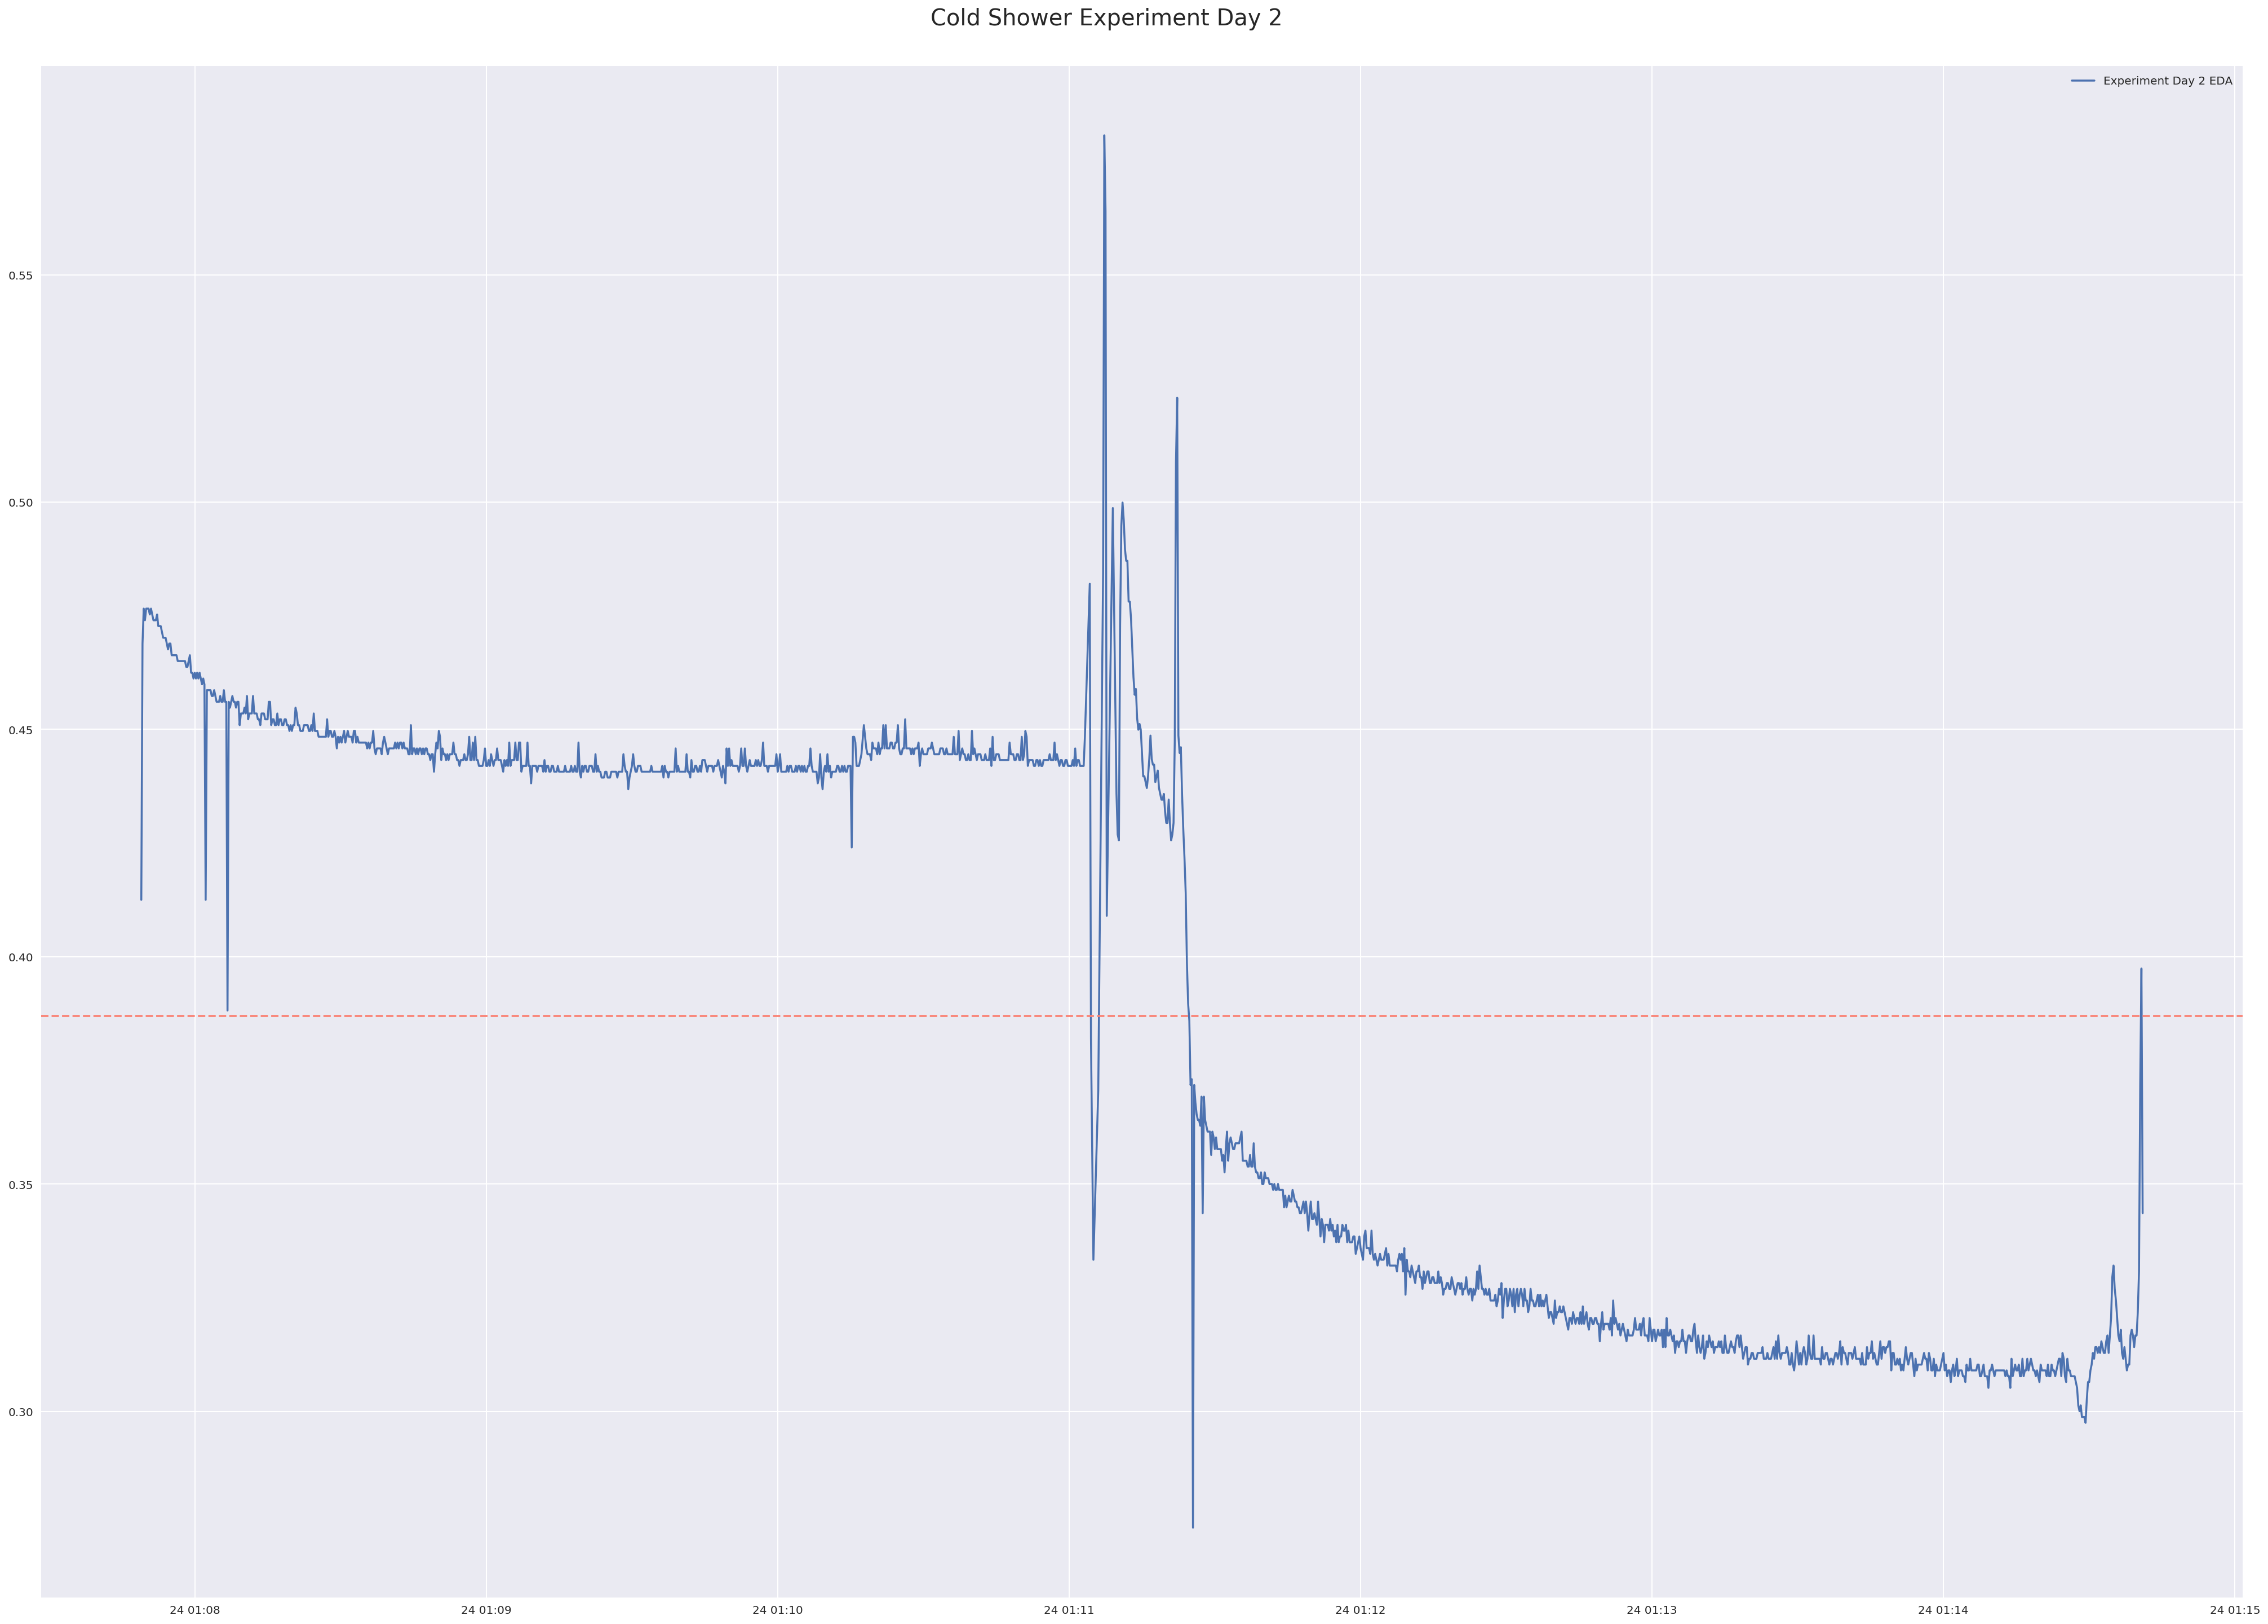

In [32]:
y_mean = np.mean(fl_exp2.eda)
plt.figure(figsize=(35,25))
plt.plot(fl_exp2)
plt.legend(['Experiment Day 2 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 2', fontsize=20, ha='center')
plt.show()

### Day 1


I consider the experiment is 3 minutes and the sampling frequencyf is 4Hz which is 0.25s per record. We can take 720 records based on this frequency. We then exclude the last 3 second which might be the dalay of the process of truning off the wristband. 

In turn we will first exclude the last 3 *4 = 12 records which include 720 + 12 = 732 records into our analysis as the experimental period every day .

In [33]:
fl_day0 = fl_exp0[-720:]
fl_day1 = fl_exp1[-720:]
fl_day2 = fl_exp2[-720:]

## EDA Analysis

## CR 

 **r**: phasic component
     
 
 **p**: sparse SMNA driver of phasic component
     
     
 **t**: tonic component
     
     
 **l**: coefficients of tonic spline
     
     
 **d**: offset and slope of the linear drift term
 
 
 **e**: model residuals
 
 
 **obj**: value of objective function being minimized (eq 15 of paper)

### Day 0

In [34]:
y0 = np.asarray(fl_exp0.eda)
y0[:10]

array([0.344616, 0.415076, 0.380487, 0.388173, 0.416357, 0.374081,
       0.353584, 0.381768, 0.417639, 0.41892 ])

In [35]:
yn0 = (y0 - y0.mean()) / y0.std()
Fs = 4.
[r0, p0, t0, l0, d0, e0, obj0] = cvxEDA.cvxEDA(yn0, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm0 = pl.arange(1., len(y0)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -5.7110e+02 -5.6010e+02  2e+03  5e+01  5e-01
 1: -5.7590e+02 -8.4160e+02  3e+02  7e+00  7e-02
 2: -5.8427e+02 -7.1504e+02  1e+02  2e+00  2e-02
 3: -5.8706e+02 -6.5896e+02  7e+01  1e+00  1e-02
 4: -5.8931e+02 -6.3868e+02  5e+01  6e-01  6e-03
 5: -5.9110e+02 -6.1327e+02  2e+01  2e-01  2e-03
 6: -5.9175e+02 -6.0598e+02  1e+01  1e-01  1e-03
 7: -5.9246e+02 -5.9707e+02  5e+00  2e-02  2e-04
 8: -5.9385e+02 -5.9473e+02  9e-01  2e-03  2e-05
 9: -5.9421e+02 -5.9452e+02  3e-01  5e-04  6e-06
10: -5.9436e+02 -5.9445e+02  9e-02  1e-04  1e-06
11: -5.9440e+02 -5.9442e+02  2e-02  1e-05  1e-07
12: -5.9441e+02 -5.9442e+02  6e-03  2e-06  2e-08
13: -5.9441e+02 -5.9441e+02  1e-03  4e-07  4e-09
14: -5.9441e+02 -5.9441e+02  3e-04  7e-08  7e-10
15: -5.9441e+02 -5.9441e+02  3e-05  3e-09  3e-11
16: -5.9441e+02 -5.9441e+02  1e-06  1e-10  1e-12
17: -5.9441e+02 -5.9441e+02  5e-08  4e-12  5e-14
Optimal solution found.


In [39]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pl.rcParams.update(params)

In [40]:
print(obj0)

[8.08623404]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


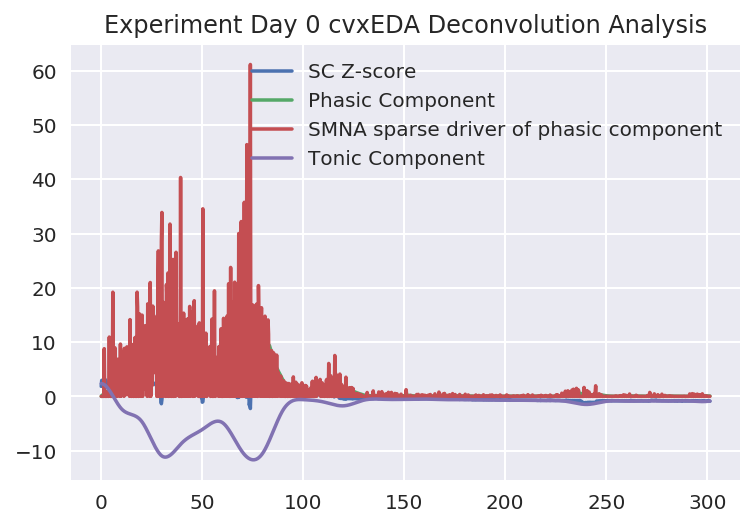

In [36]:
pl.hold(True)
pl.plot(tm0, yn0)
pl.plot(tm0, r0)
pl.plot(tm0, p0)
pl.plot(tm0, t0)
pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


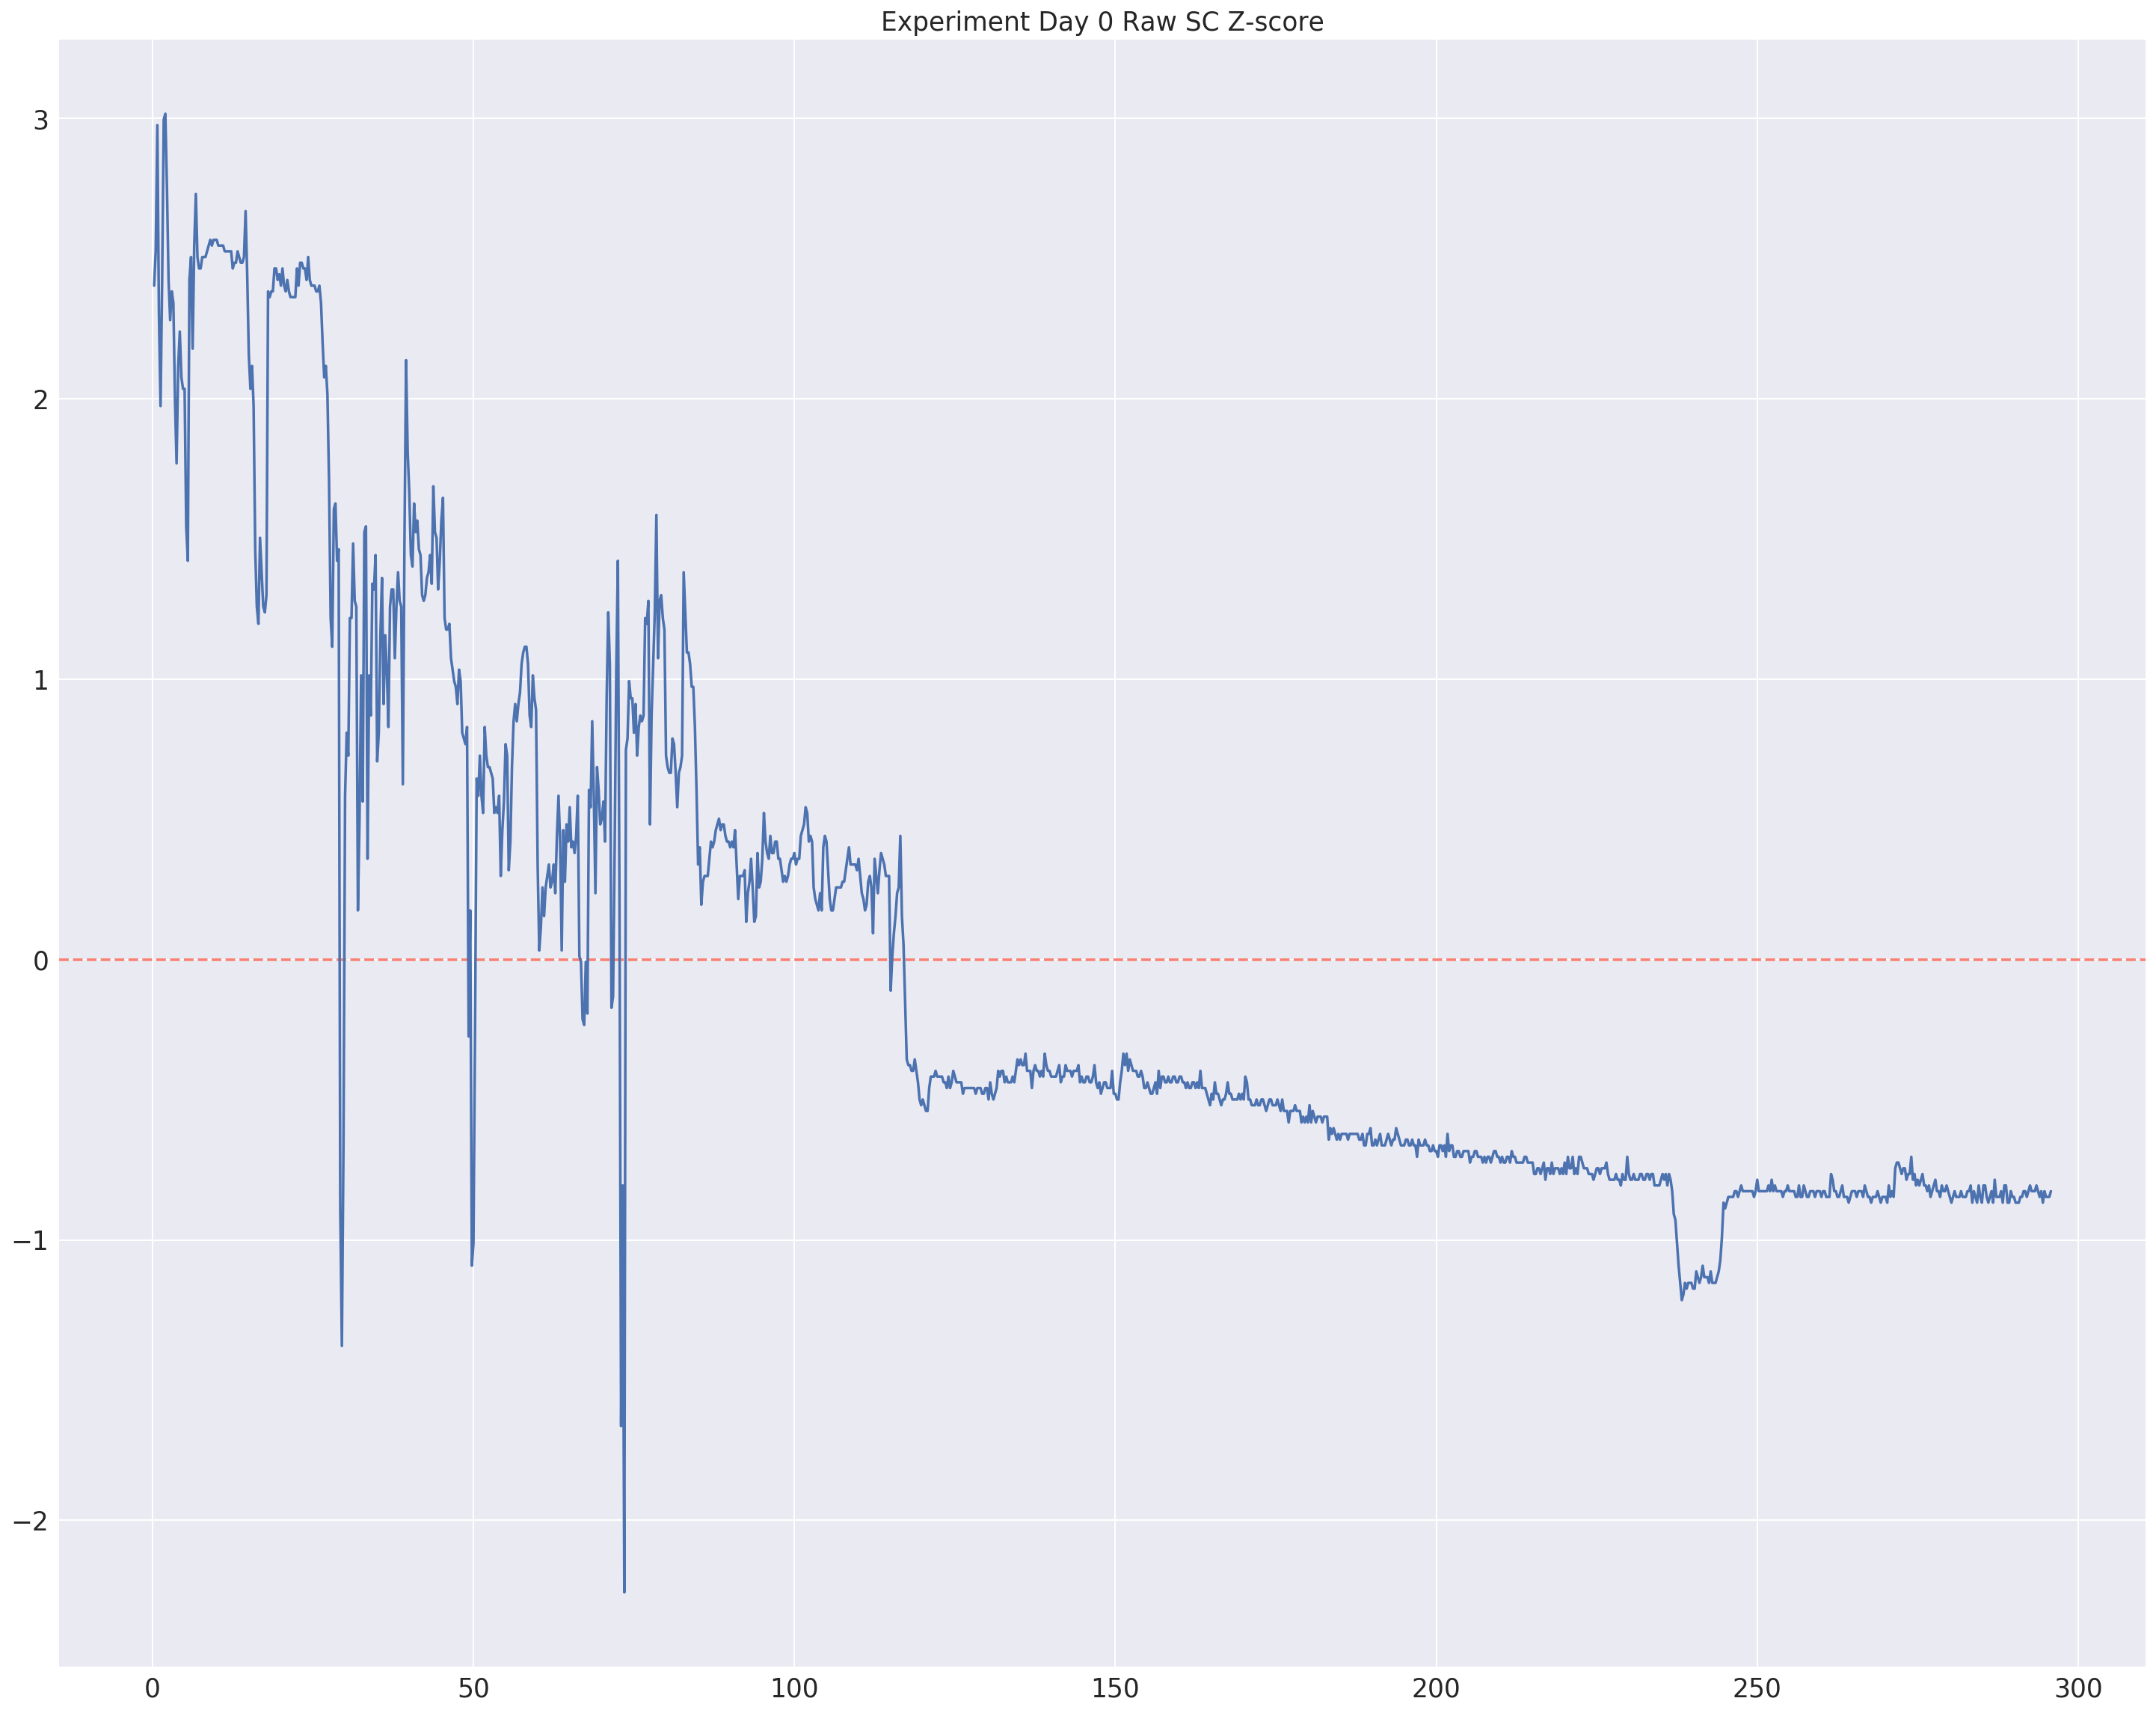

In [57]:
pl.hold(True)
y_mean = np.mean(yn)
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 Raw SC Z-score')
# pl.legend(['SC series','Phasic Component','SMNA sparse driver of phasic component',
#            'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


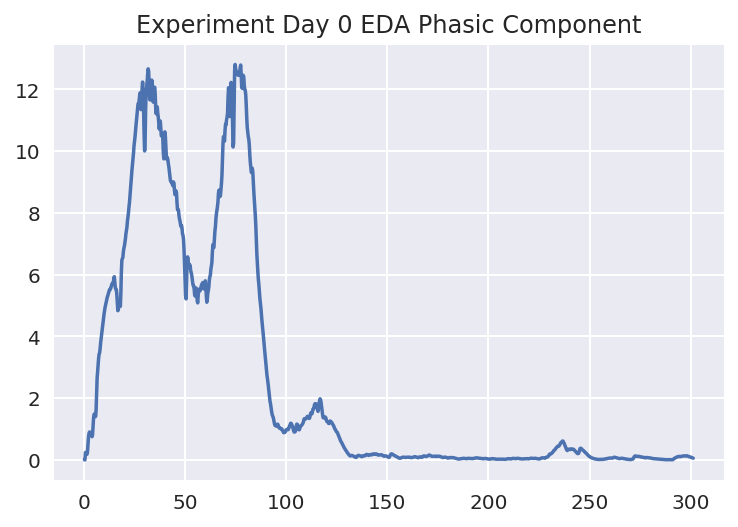

In [37]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm0, r0)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


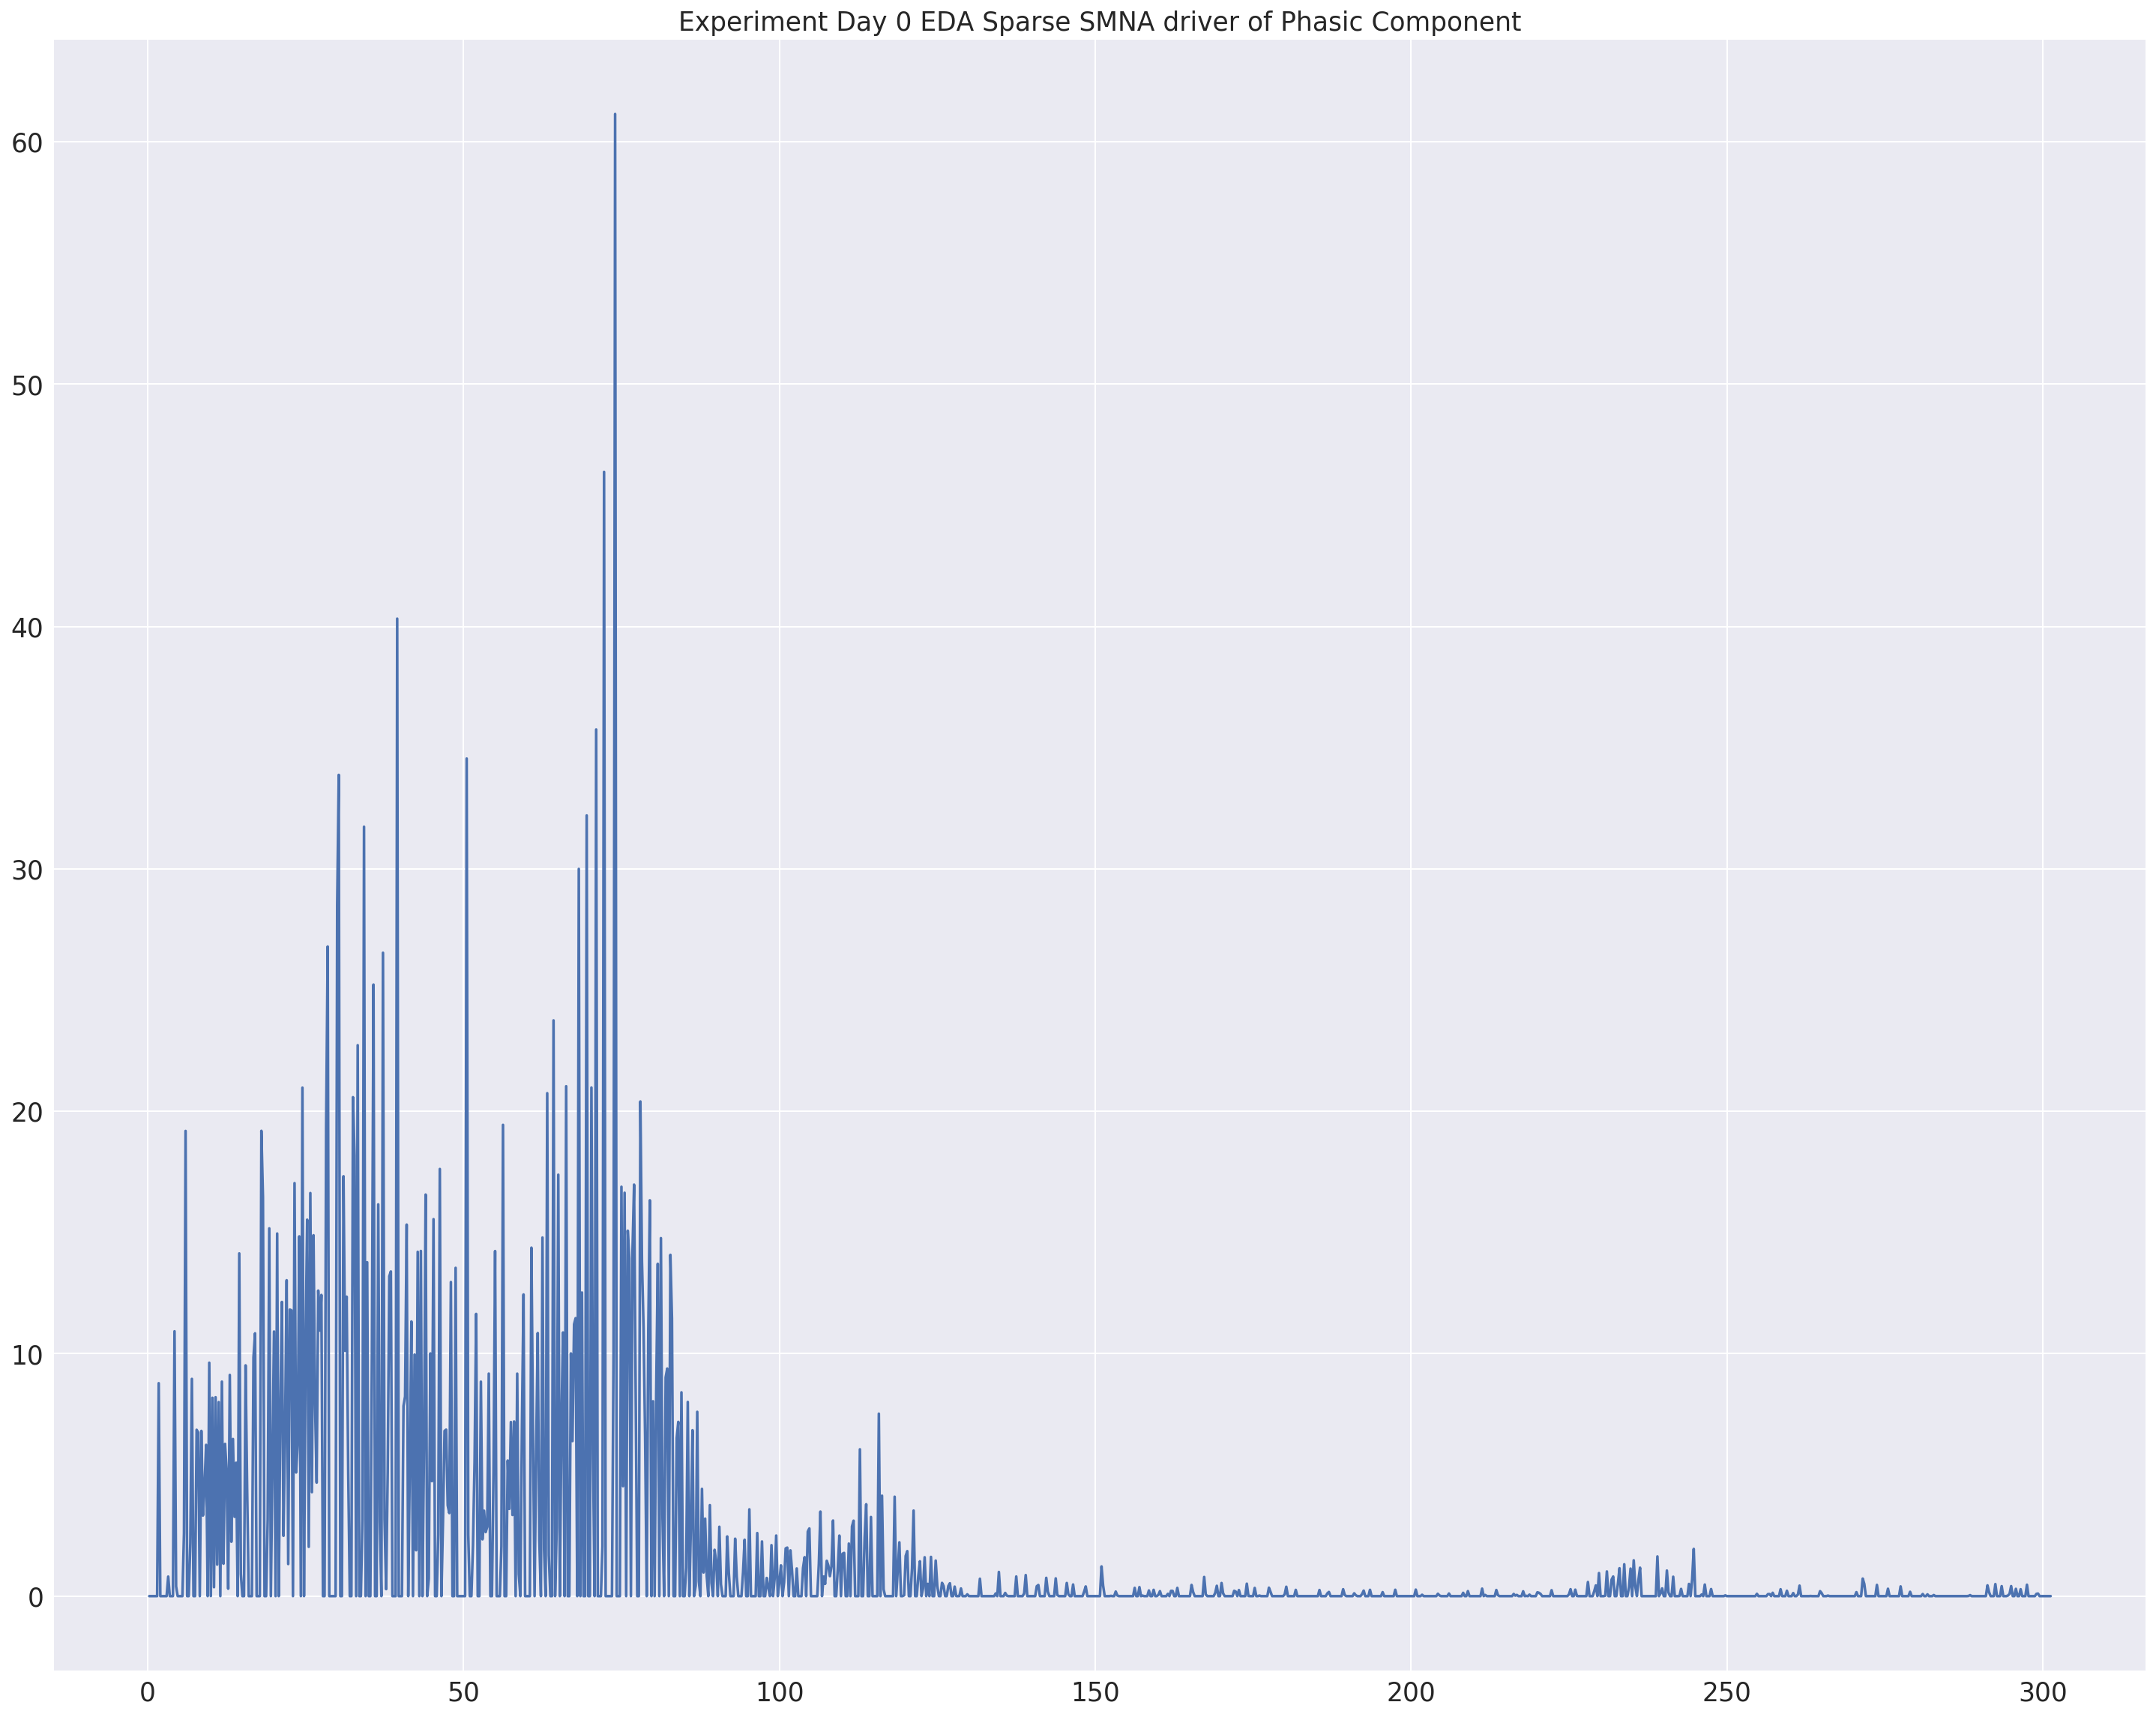

In [41]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
pl.plot(tm0, p0)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


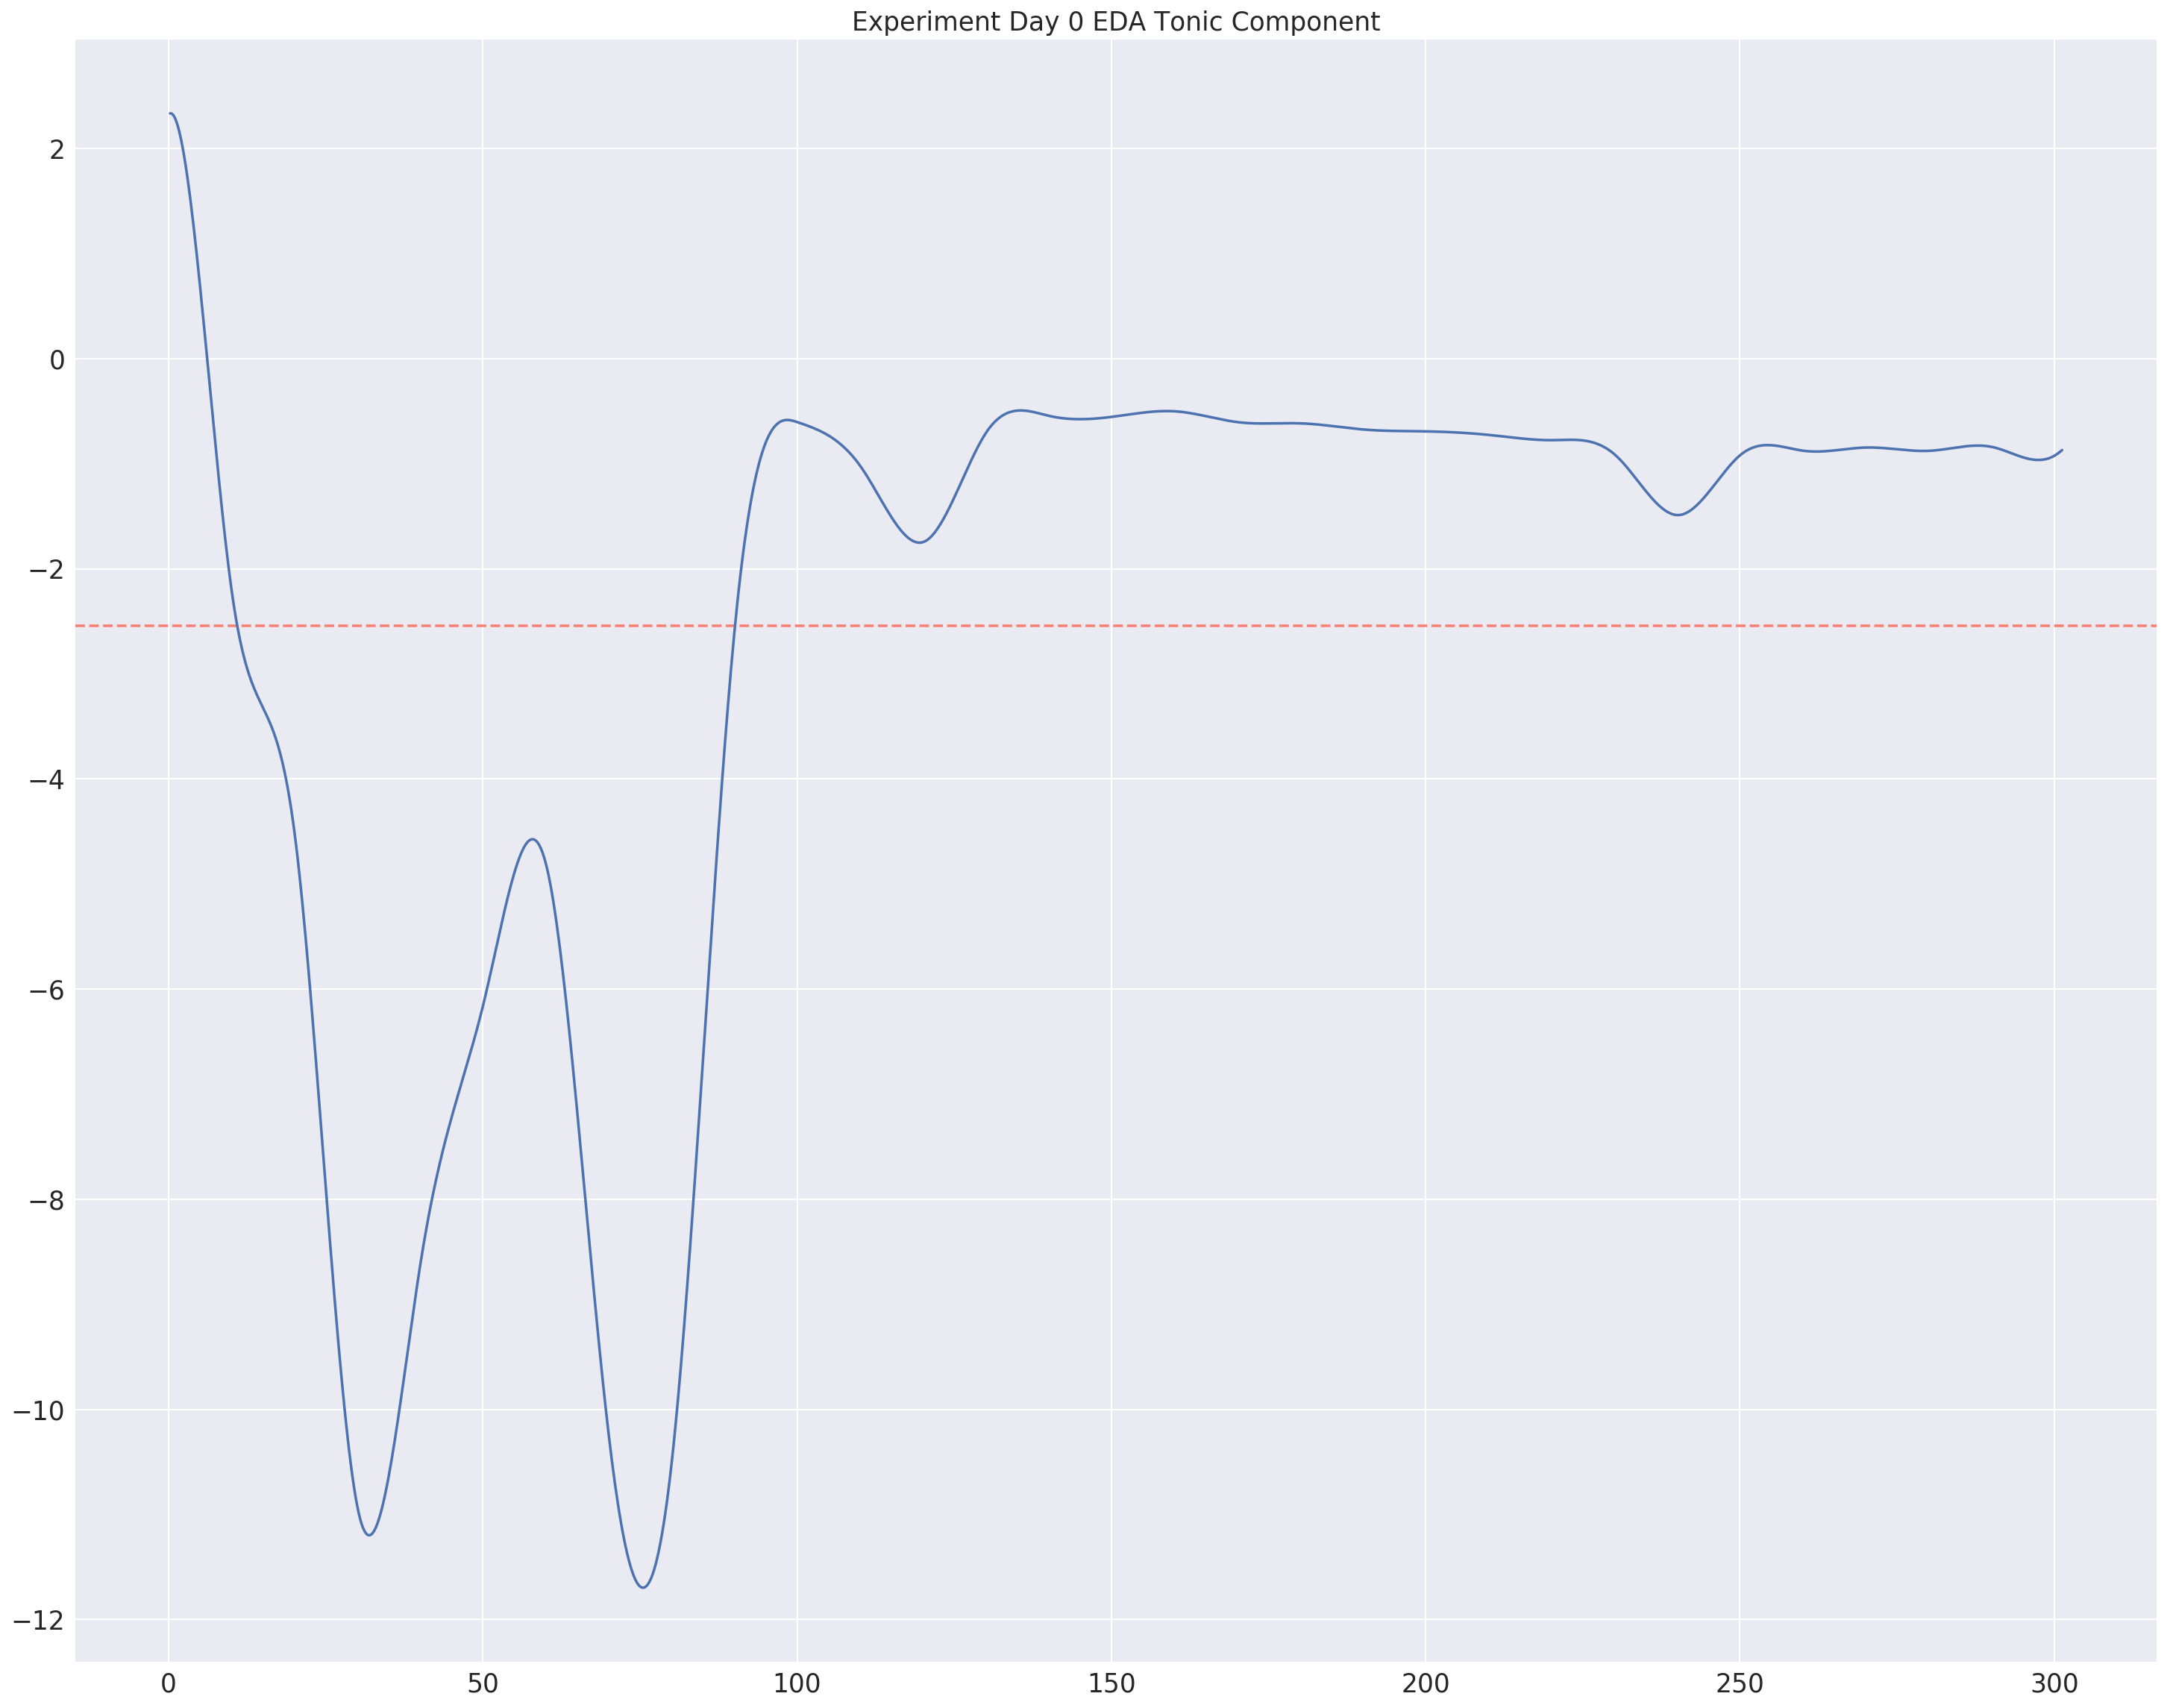

In [48]:
pl.hold(True)
t_mean0 = np.mean(t0)
plt.axhline(y = t_mean0,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0, t0)
pl.title('Experiment Day 0 EDA Tonic Component')
pl.show()

### Day 1 Visuals

In [42]:
y1 = np.asarray(fl_exp1.eda)
y1[:10]

array([0.352302, 0.356146, 0.354865, 0.357427, 0.357427, 0.336929,
       0.356146, 0.354865, 0.356146, 0.354865])

In [43]:
yn1 = (y1 - y1.mean()) / y1.std()
Fs = 4.
[r1, p1, t1, l1, d1, e1, obj1] = cvxEDA.cvxEDA(yn1, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm1 = pl.arange(1., len(y1)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -8.2974e+02 -7.9647e+02  5e+03  7e+01  8e-01
 1: -8.5251e+02 -1.8761e+03  1e+03  2e+01  2e-01
 2: -8.8512e+02 -1.4467e+03  6e+02  6e+00  7e-02
 3: -9.0373e+02 -1.1637e+03  3e+02  2e+00  2e-02
 4: -9.1701e+02 -1.0996e+03  2e+02  1e+00  1e-02
 5: -9.2820e+02 -1.0306e+03  1e+02  5e-01  6e-03
 6: -9.3648e+02 -1.0088e+03  7e+01  2e-01  3e-03
 7: -9.4233e+02 -9.8097e+02  4e+01  1e-01  1e-03
 8: -9.4686e+02 -9.6152e+02  1e+01  3e-02  4e-04
 9: -9.4935e+02 -9.5465e+02  5e+00  9e-03  1e-04
10: -9.5049e+02 -9.5213e+02  2e+00  1e-03  1e-05
11: -9.5107e+02 -9.5134e+02  3e-01  2e-04  2e-06
12: -9.5117e+02 -9.5121e+02  4e-02  2e-05  3e-07
13: -9.5119e+02 -9.5119e+02  5e-03  2e-06  2e-08
14: -9.5119e+02 -9.5119e+02  2e-04  8e-08  1e-09
15: -9.5119e+02 -9.5119e+02  7e-06  2e-09  2e-11
16: -9.5119e+02 -9.5119e+02  2e-07  2e-11  1e-12
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


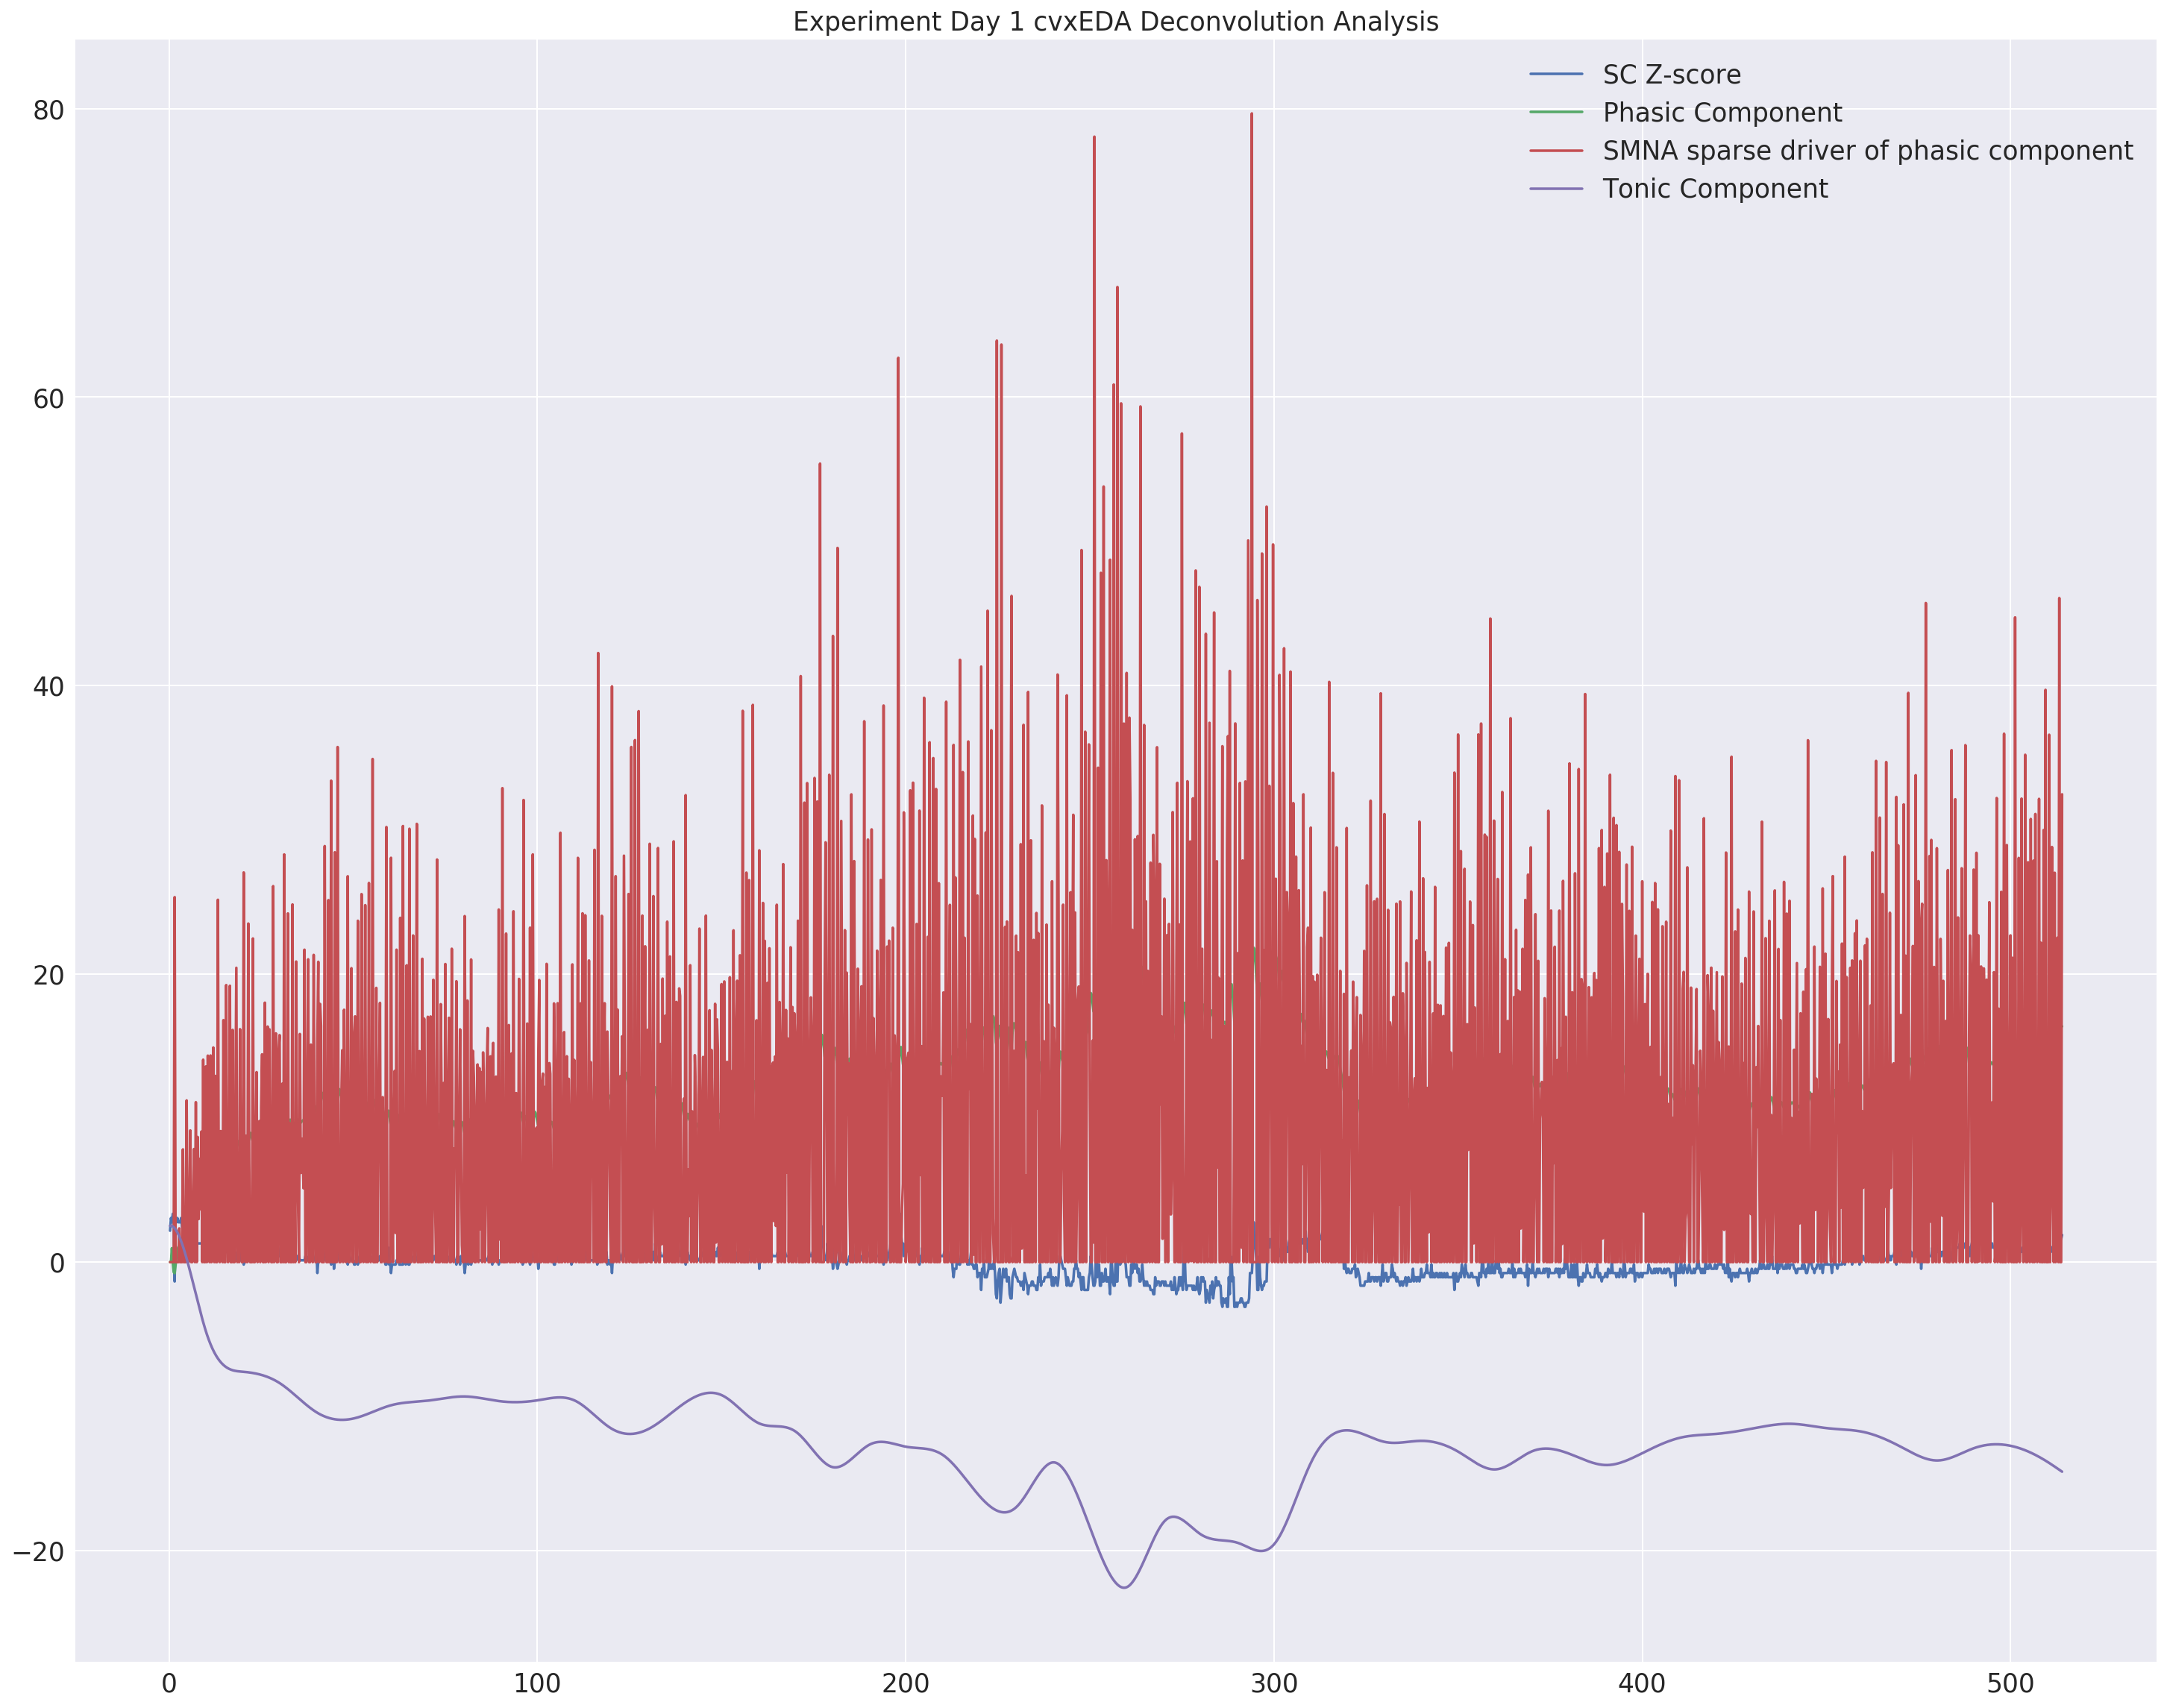

In [44]:
pl.hold(True)
pl.plot(tm1, yn1)
pl.plot(tm1, r1)
pl.plot(tm1, p1)
pl.plot(tm1, t1)
pl.title('Experiment Day 1 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


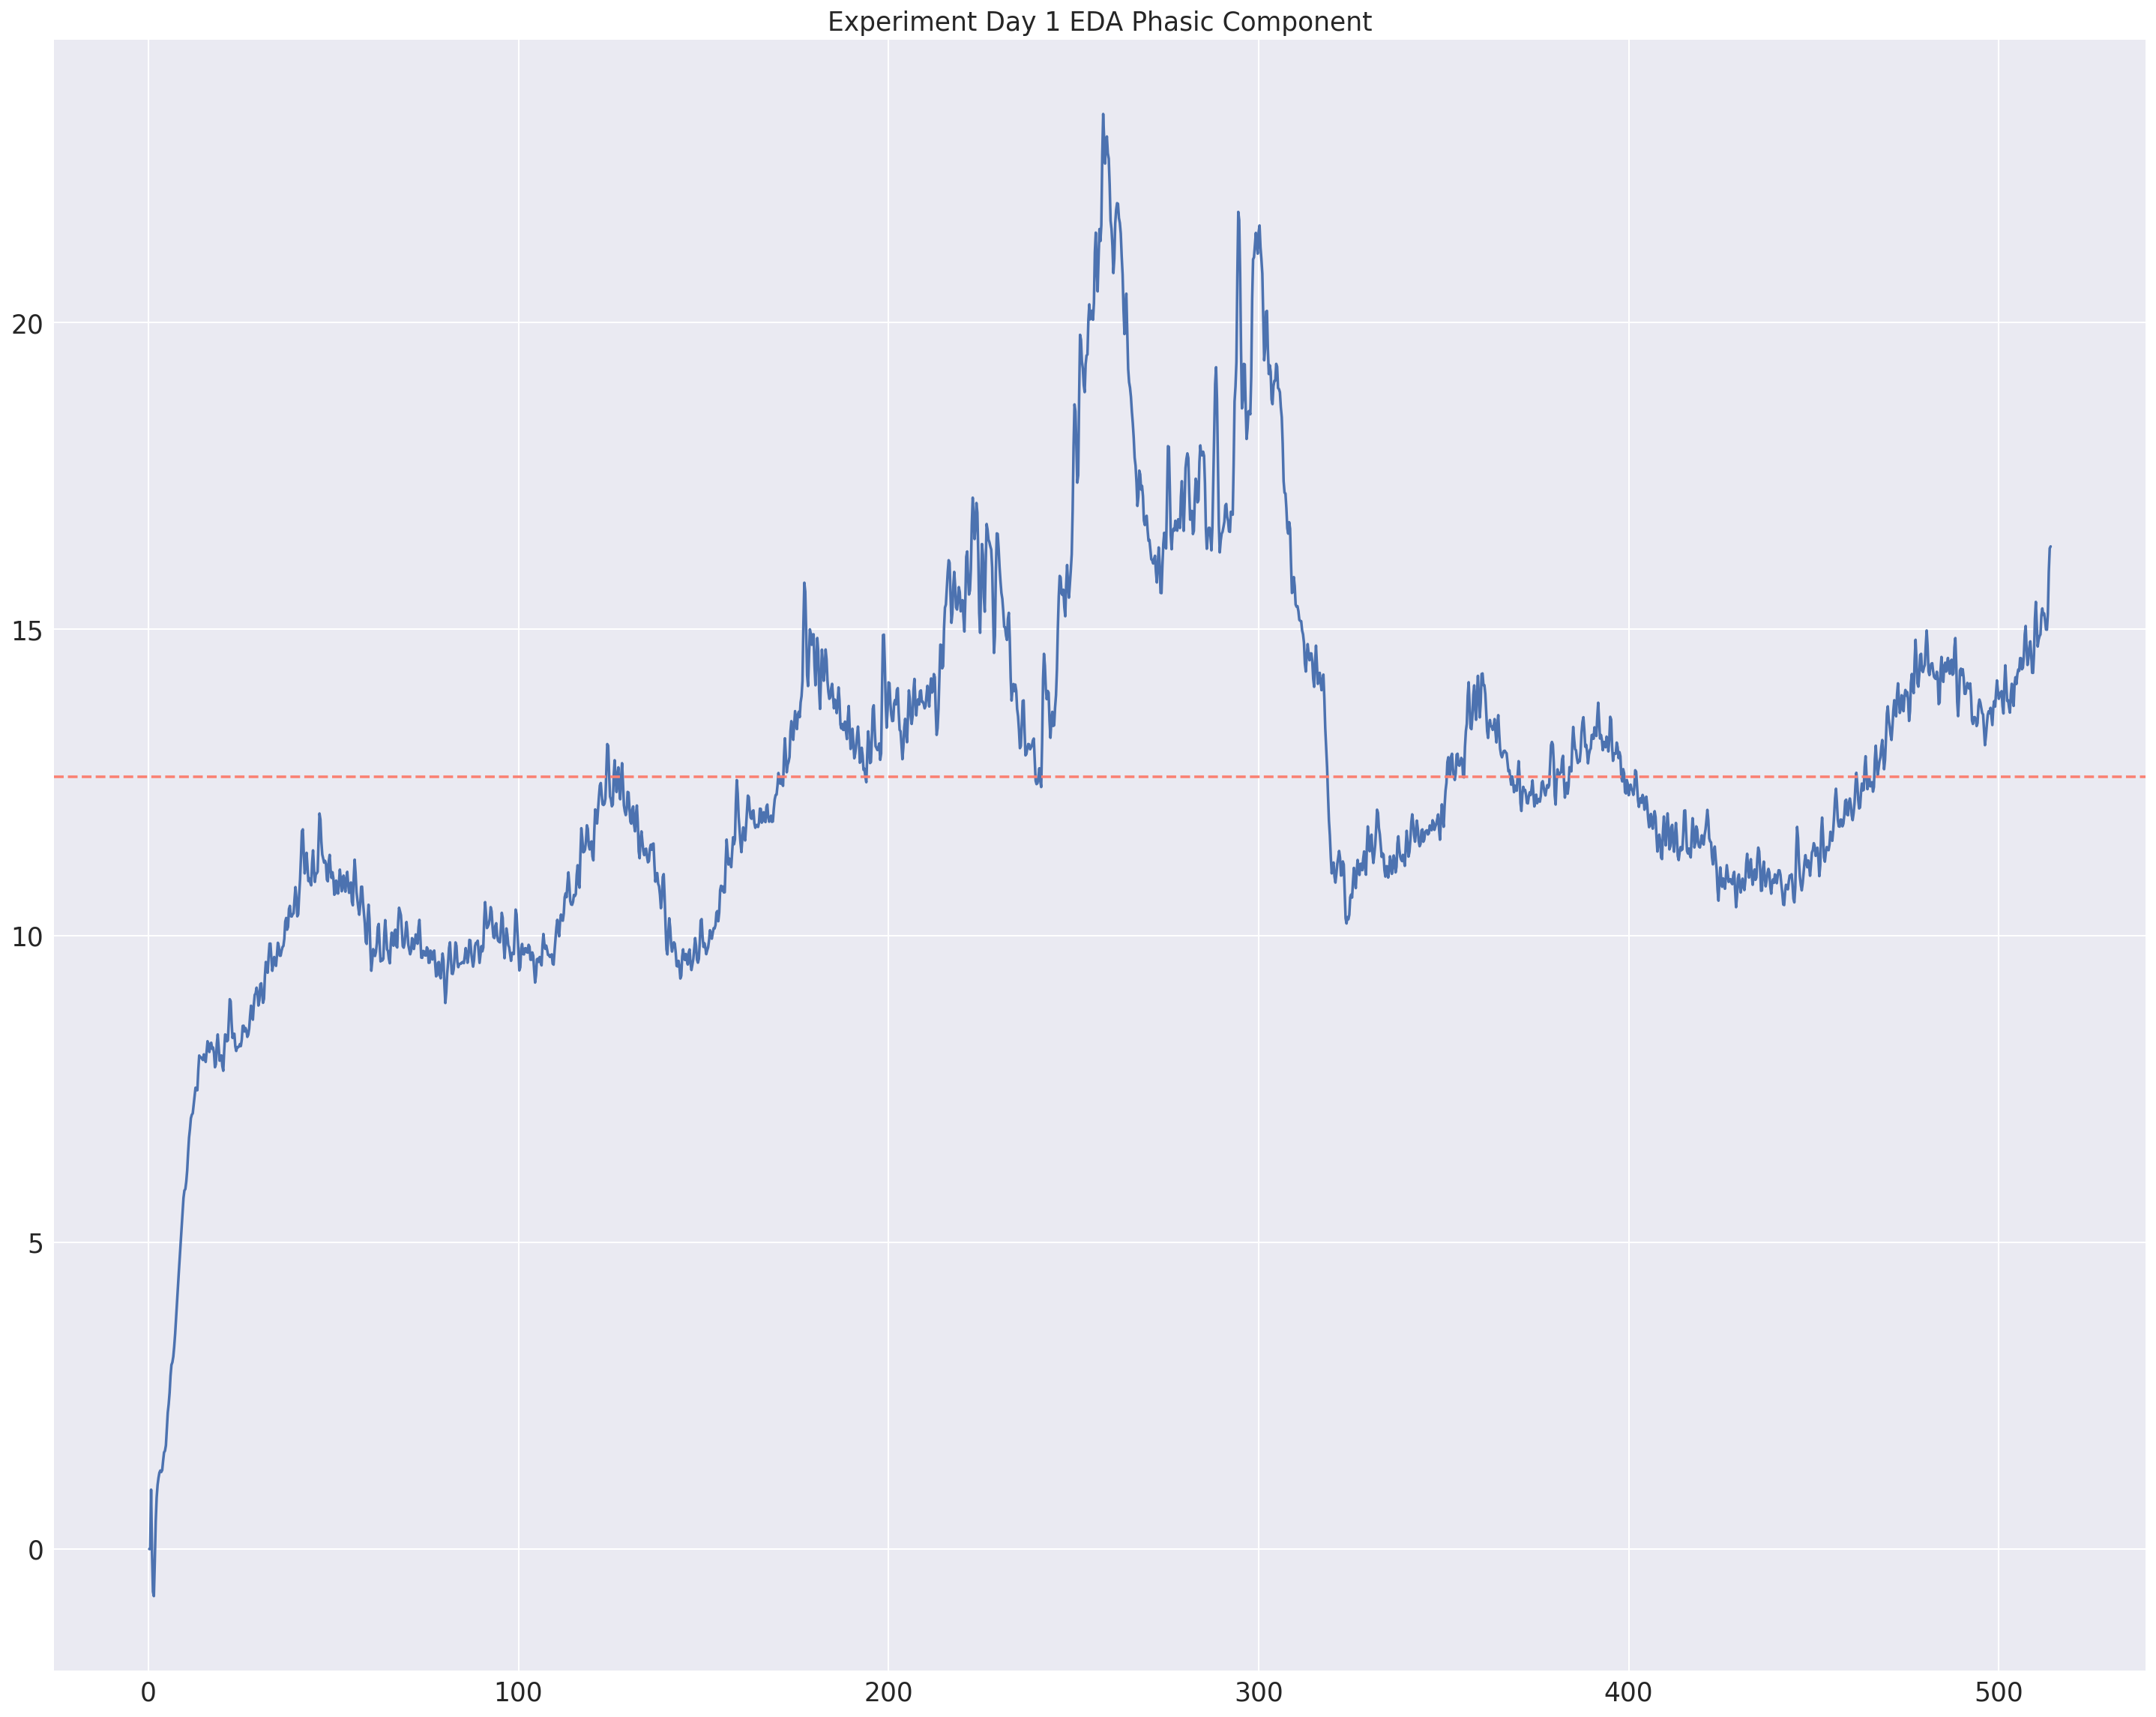

In [50]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm1, r1)
# pl.plot(tm, p)
# pl.plot(tm, t)
p_mean1 = np.mean(r1)
plt.axhline(y =p_mean1,color = 'salmon',linestyle='--')
pl.title('Experiment Day 1 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


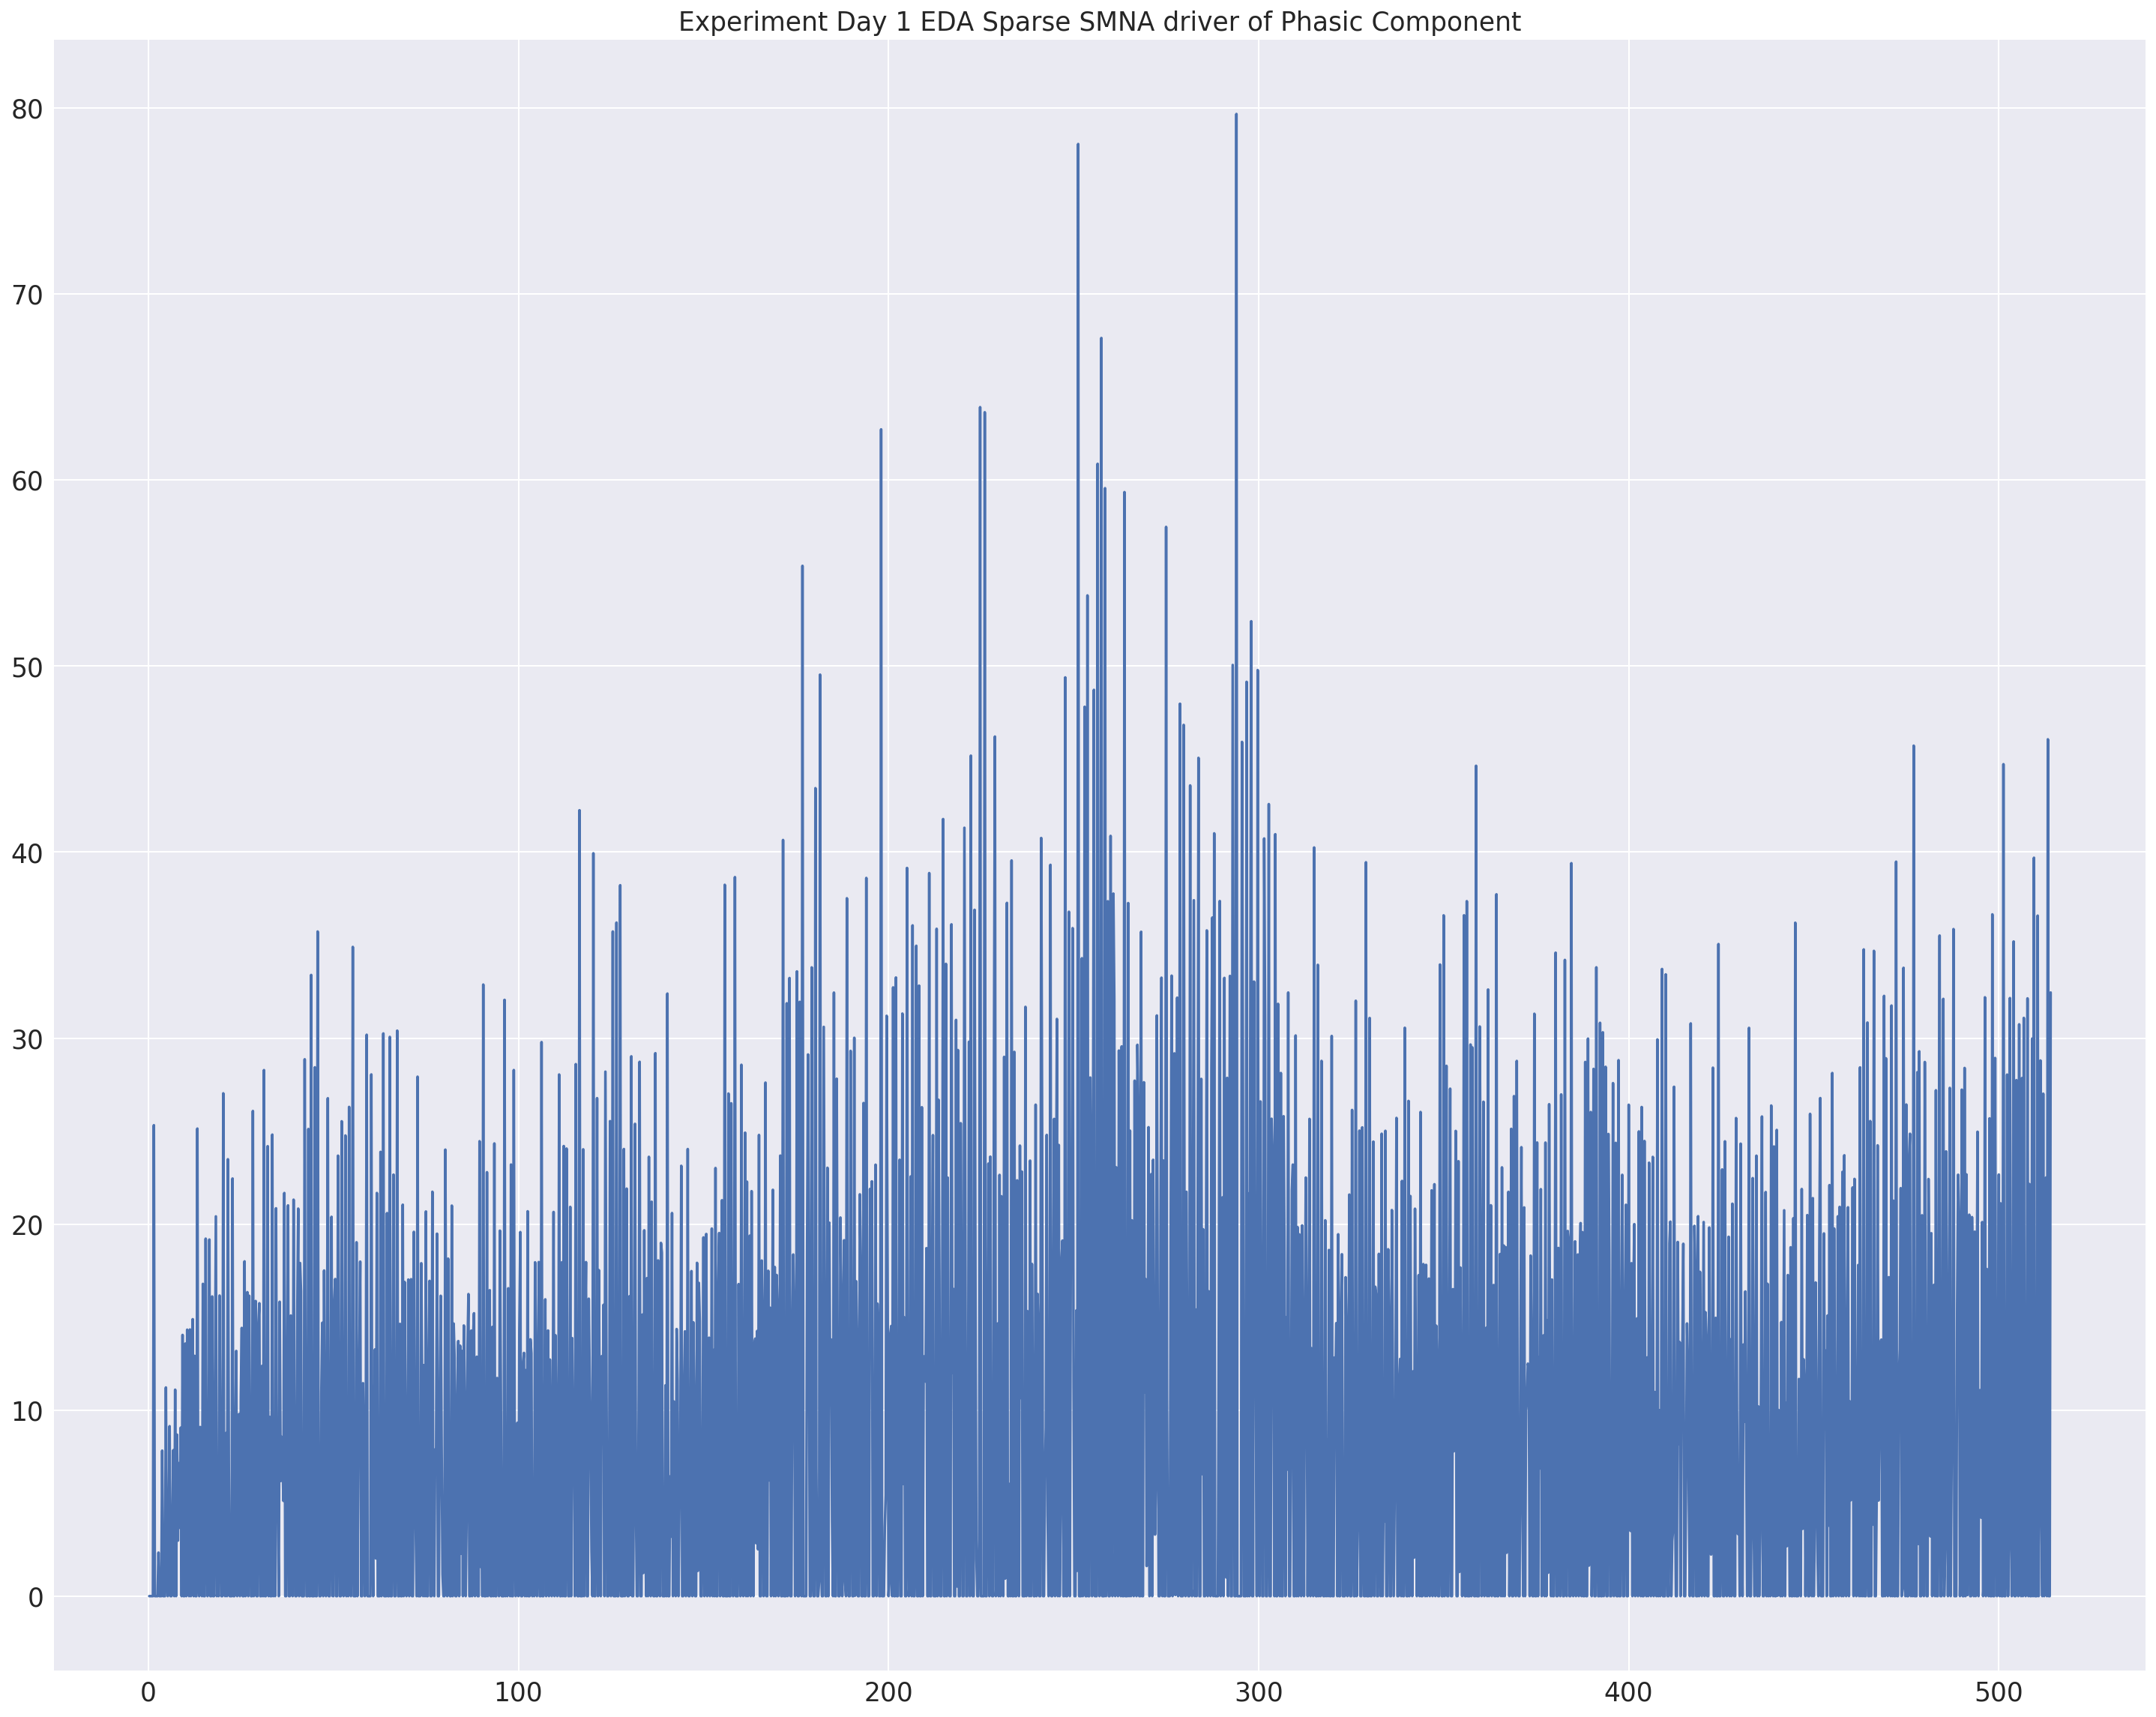

In [46]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
pl.plot(tm1, p1)
# pl.plot(tm, t)
pl.title('Experiment Day 1 EDA Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


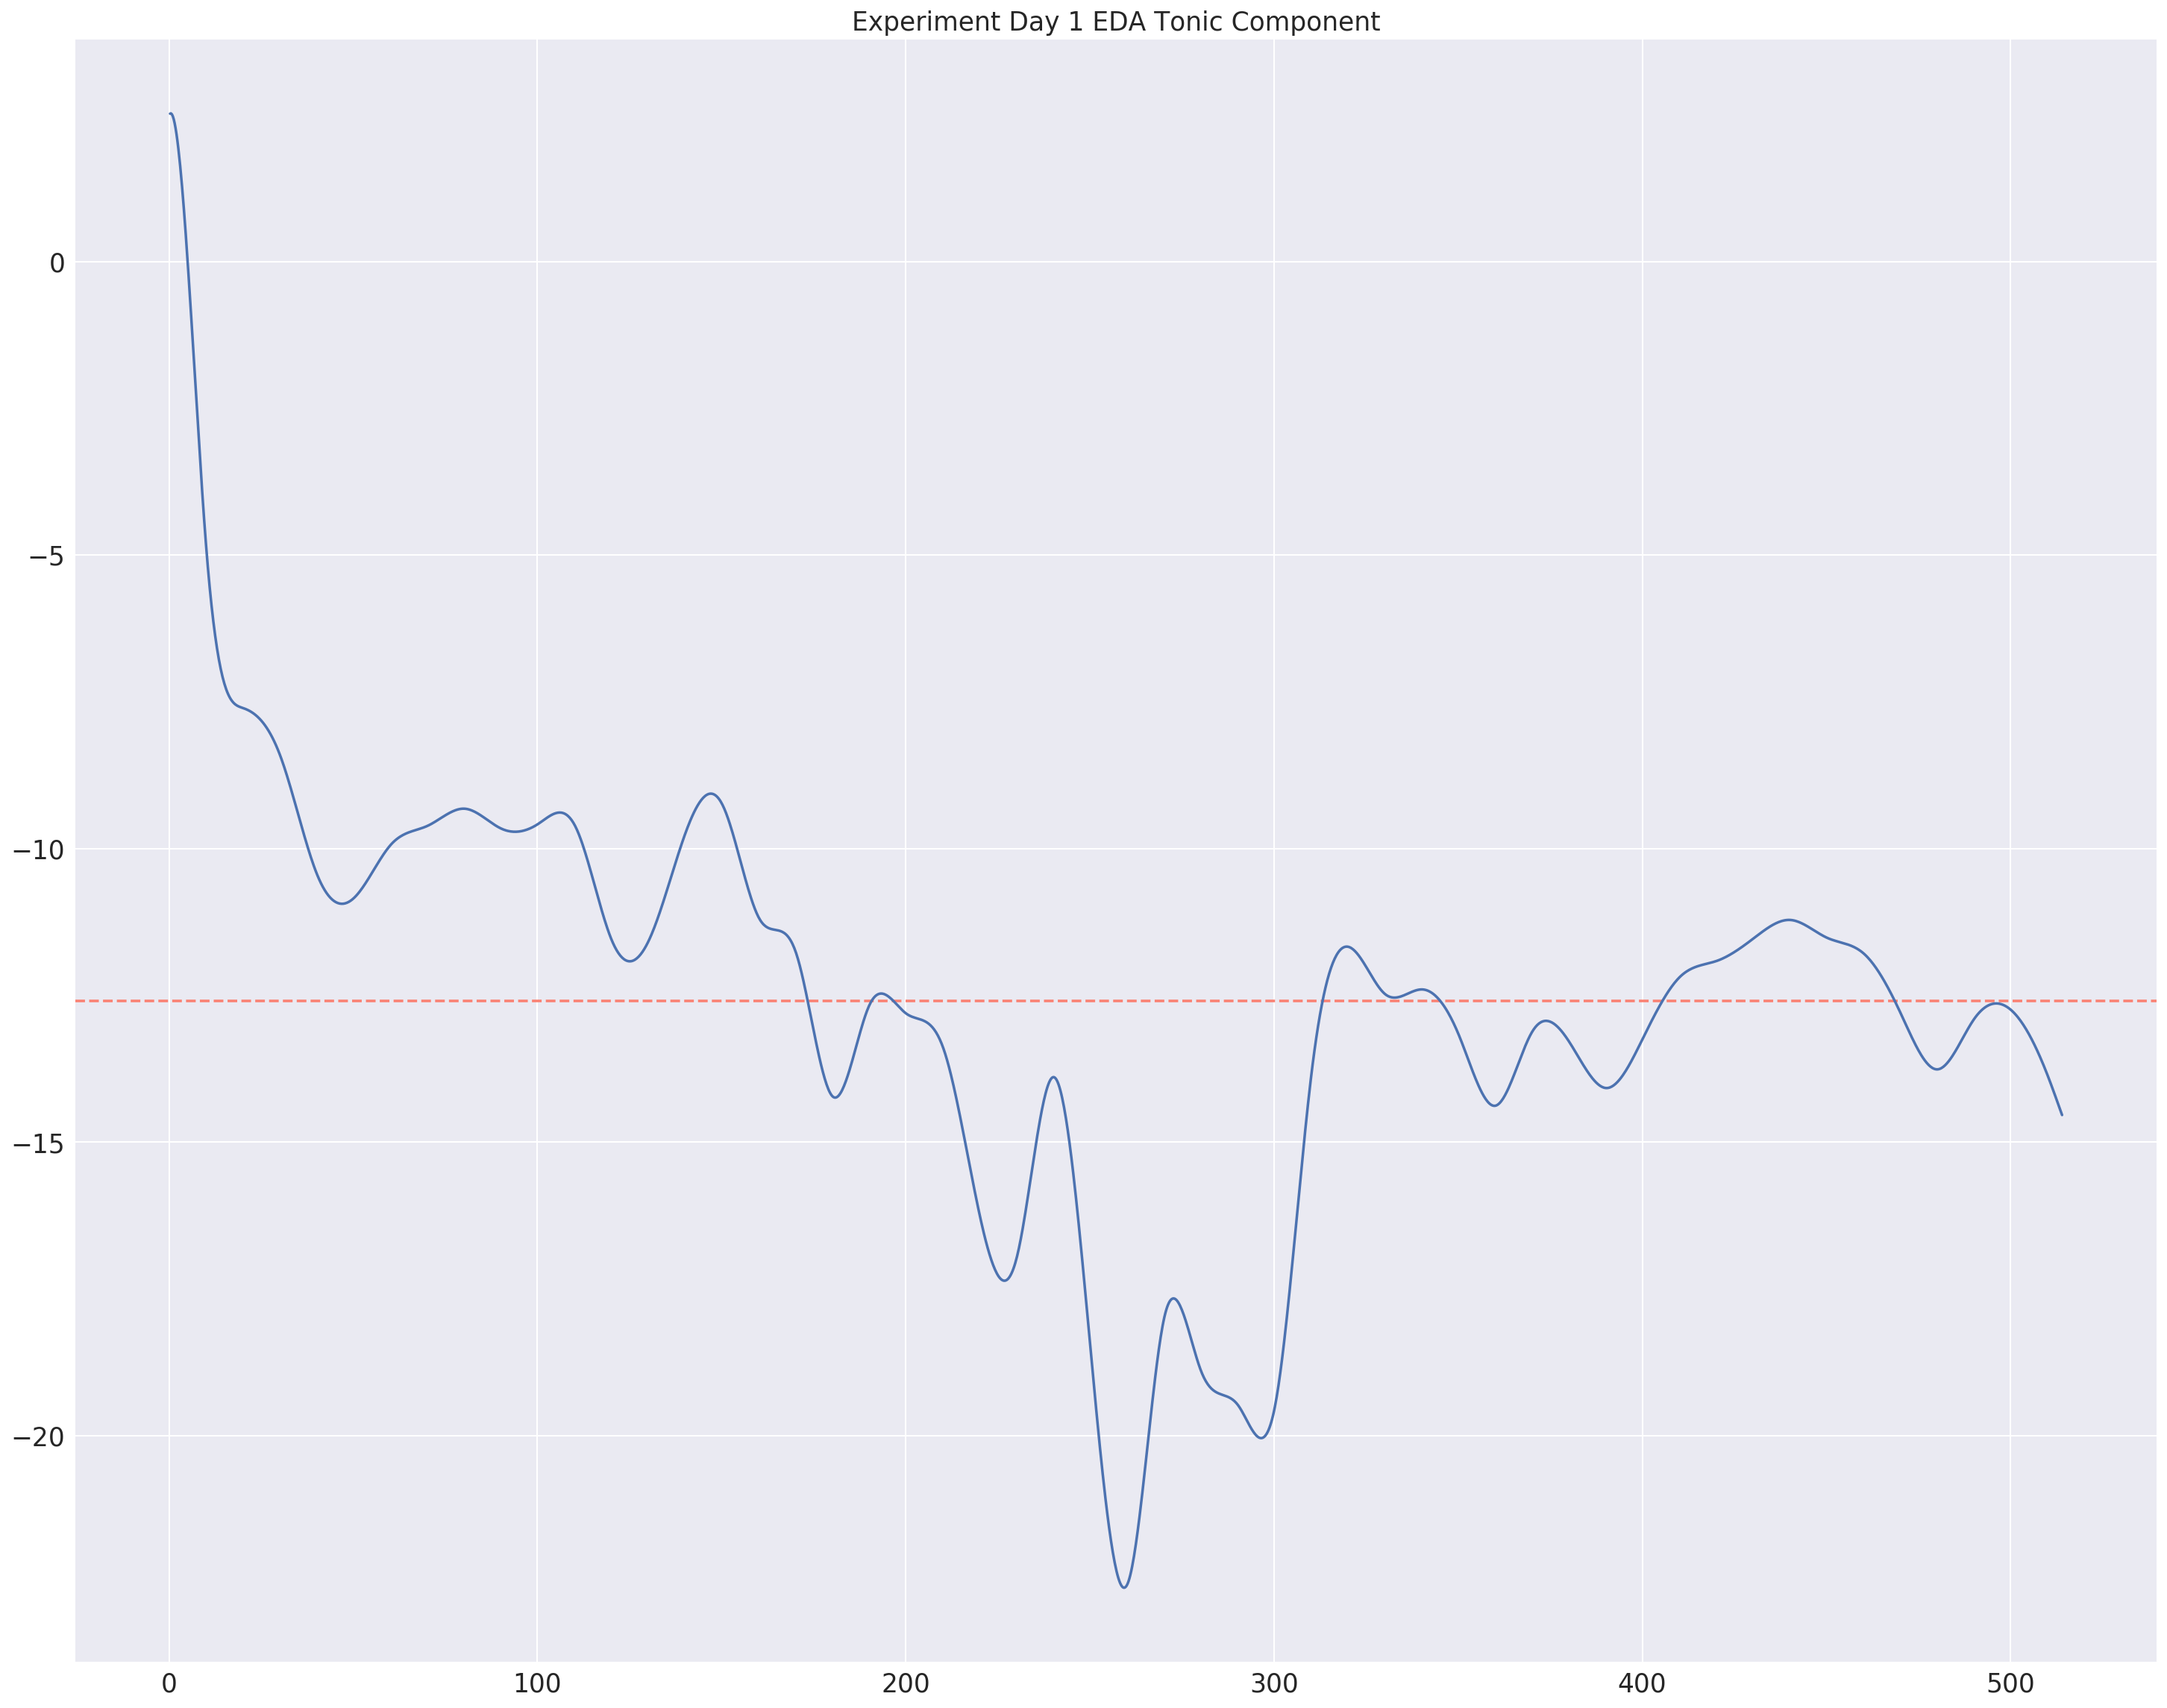

In [51]:
pl.hold(True)
t_mean1 = np.mean(t1)
plt.axhline(y = t_mean1,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm1, t1)
pl.title('Experiment Day 1 EDA Tonic Component')
pl.show()

#### Only the 3 min experiment period data

In [52]:
y1_3 = np.asarray(fl_day1.eda)
y1_3[:10]

array([0.335648, 0.336929, 0.336929, 0.335648, 0.336929, 0.336929,
       0.33821 , 0.335648, 0.336929, 0.33821 ])

In [53]:
yn1_3 = (y1_3 - y1_3.mean()) / y1_3.std()
Fs = 4.
[r1_3, p1_3, t1_3, l1_3, d1_3, e1_3, obj1_3] = cvxEDA.cvxEDA(yn1_3, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm1_3 = pl.arange(1., len(y1_3)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -3.0557e+02 -3.0040e+02  1e+03  3e+01  7e-01
 1: -3.0904e+02 -4.1041e+02  1e+02  4e+00  8e-02
 2: -3.1522e+02 -3.7128e+02  6e+01  1e+00  3e-02
 3: -3.1996e+02 -3.4778e+02  3e+01  5e-01  1e-02
 4: -3.2392e+02 -3.3670e+02  1e+01  2e-01  5e-03
 5: -3.2757e+02 -3.3547e+02  8e+00  1e-01  2e-03
 6: -3.2945e+02 -3.3568e+02  6e+00  6e-02  1e-03
 7: -3.3053e+02 -3.3485e+02  4e+00  3e-02  7e-04
 8: -3.3116e+02 -3.3397e+02  3e+00  1e-02  3e-04
 9: -3.3147e+02 -3.3312e+02  2e+00  6e-03  1e-04
10: -3.3185e+02 -3.3215e+02  3e-01  9e-04  2e-05
11: -3.3195e+02 -3.3198e+02  3e-02  7e-05  1e-06
12: -3.3196e+02 -3.3196e+02  2e-03  4e-06  9e-08
13: -3.3196e+02 -3.3196e+02  8e-05  1e-07  2e-09
14: -3.3196e+02 -3.3196e+02  2e-06  2e-09  3e-11
15: -3.3196e+02 -3.3196e+02  1e-07  2e-11  4e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


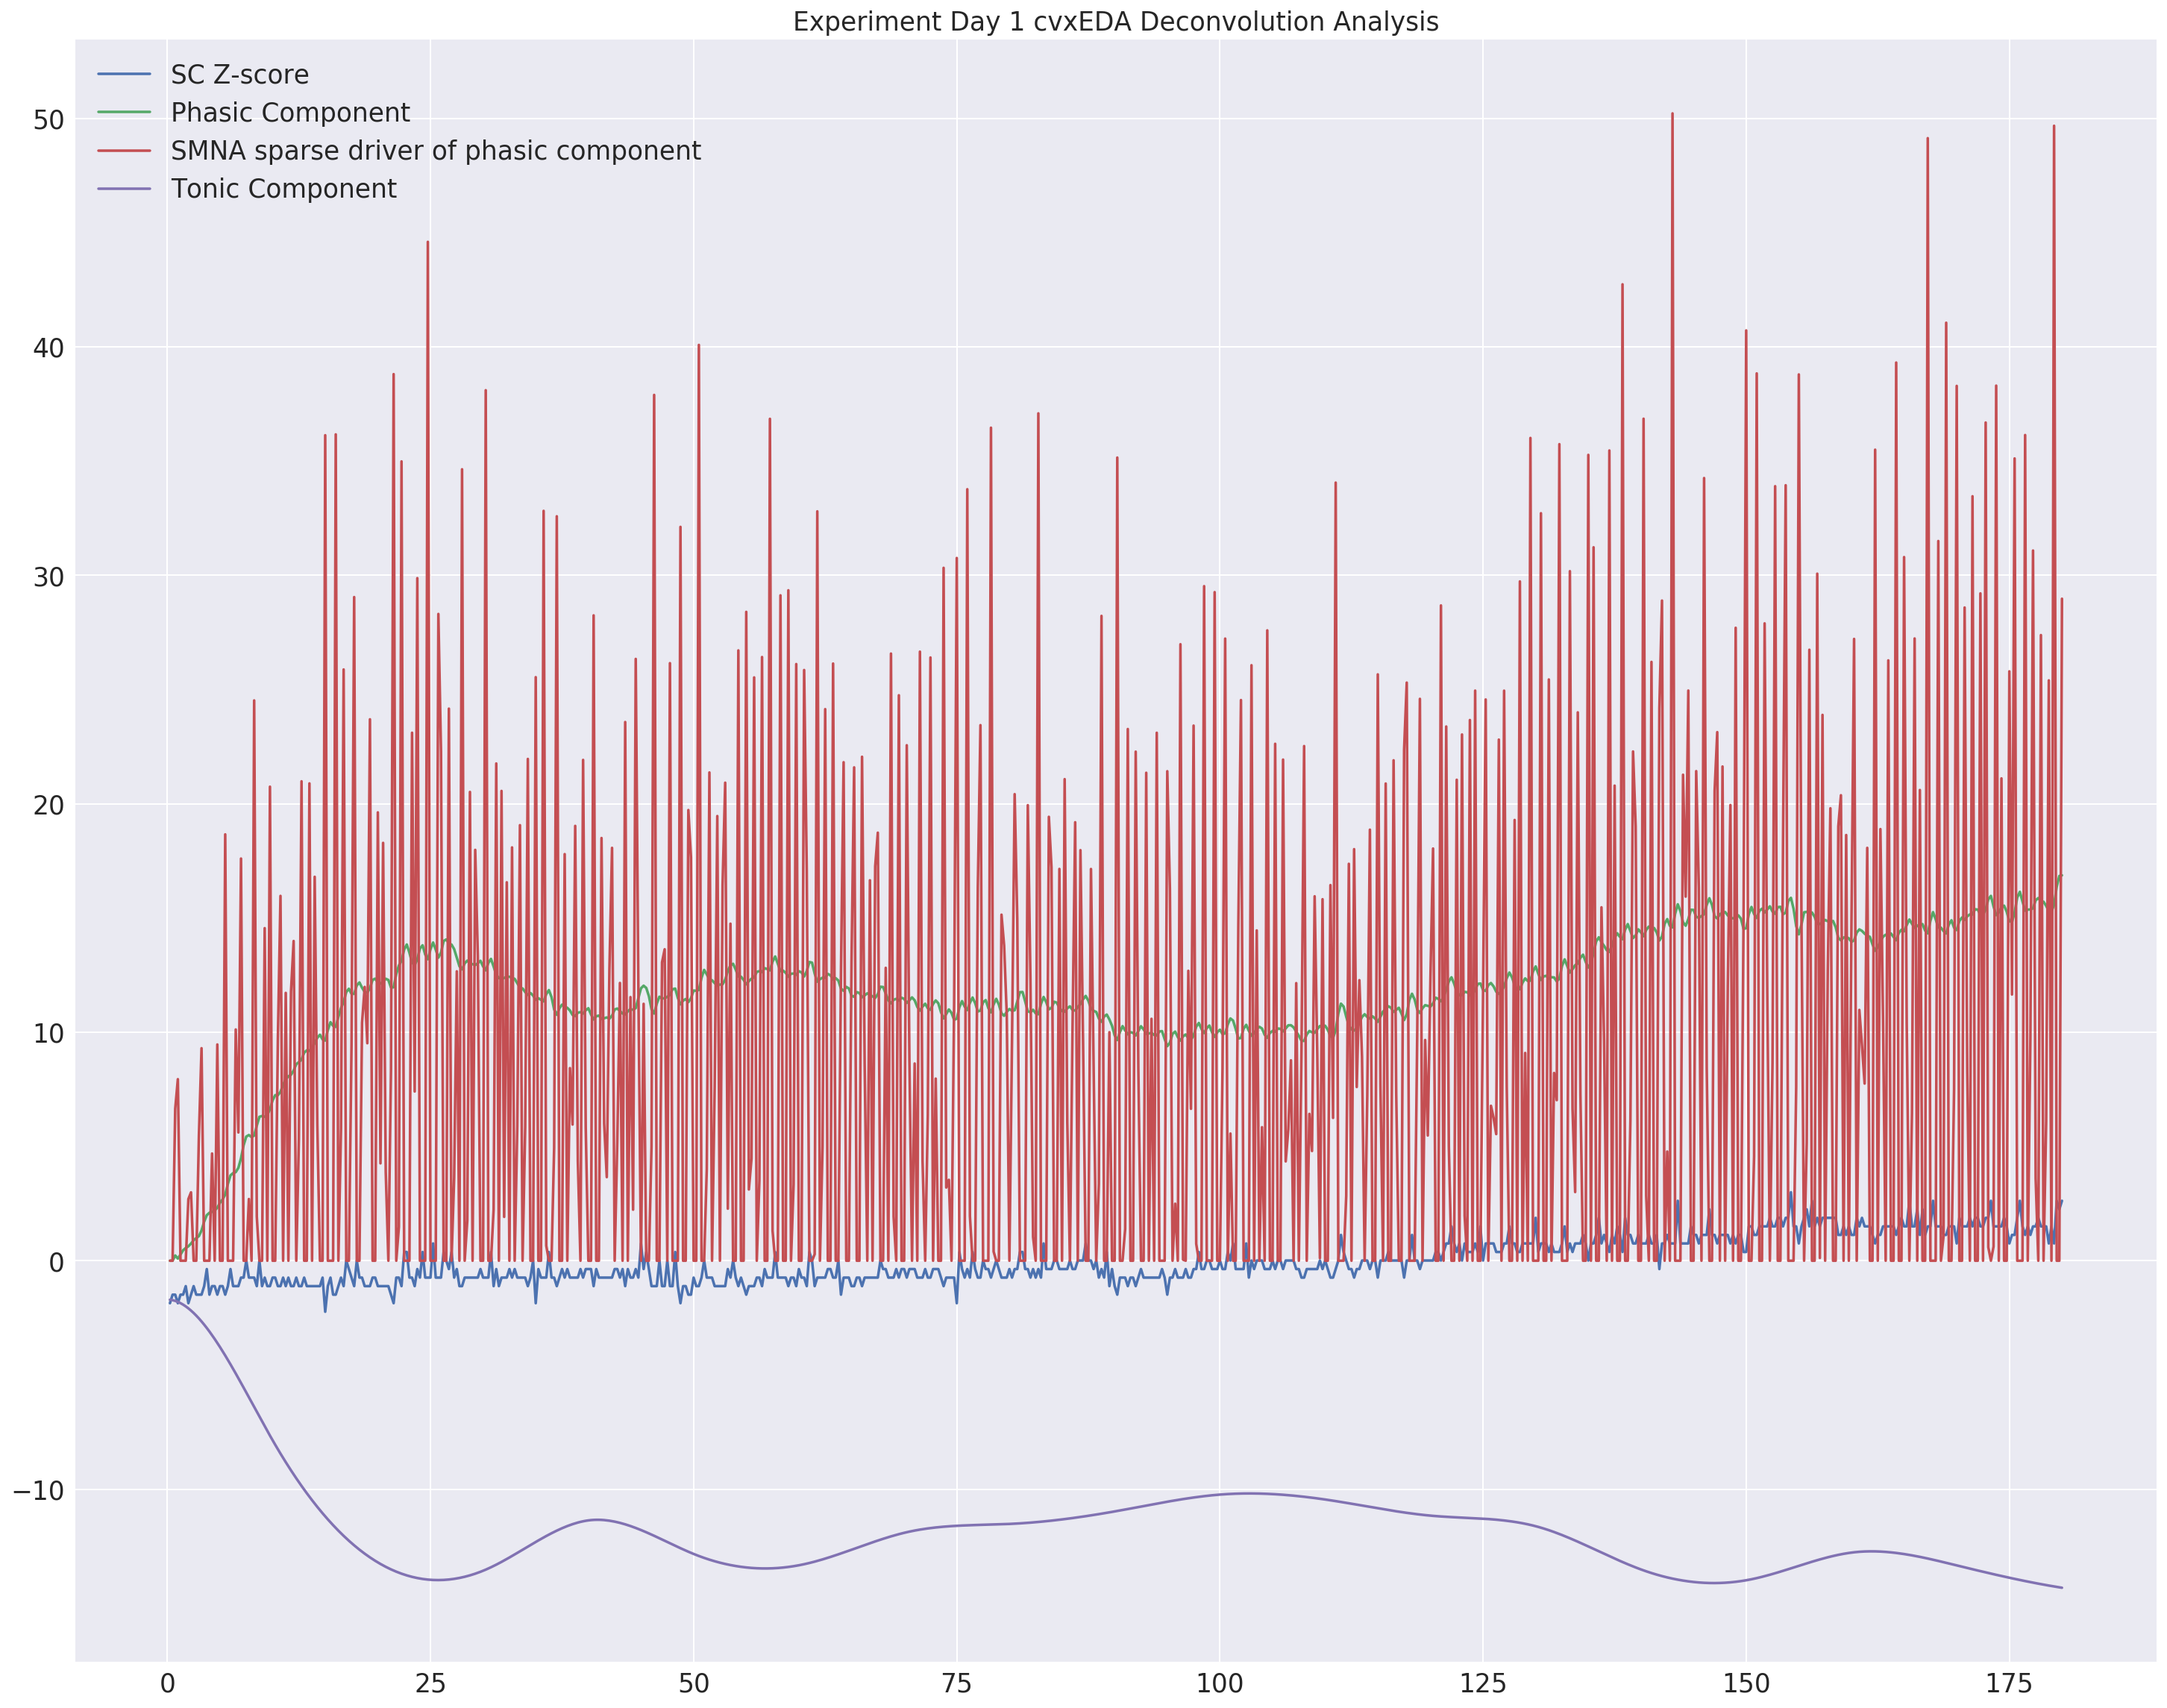

In [54]:
pl.hold(True)
pl.plot(tm1_3, yn1_3)
pl.plot(tm1_3, r1_3)
pl.plot(tm1_3, p1_3)
pl.plot(tm1_3, t1_3)
pl.title('Experiment Day 1 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()